# Titanic Survival Prediction: End-to-End ML Workflow (Top 6%)

>*“It was the ship of dreams to everyone else. To me, it was a slave ship, taking me back to America in chains. Outwardly, I was everything a well brought up girl should be. Inside, I was screaming.” —Rose*

![title](titanic.jpg)

This is my first kernel at Kaggle. The objective of this kernel is to show the comprehensive workflow of building predictive models by using machine learning tools. The workflow includes:
1. **Problem Definition**: Without a correct understanding about the problem we face, we will not be able to apply the appropriate solution to the problem. A clear definition of the problem enables us to identify the appropriate data to gather and technique(s) to use in order to solve the problem. 
2. **Data Gathering**: Data is the lifeblood of predictive analytics. We have to know which data to use, where to gather them, and how to make them useful to solve our problem. 
3. **Data Wrangling**: Raw data are generally incomplete, inconsistent, and contain many errors. Thus, we need to prepare the data for further processing. Data wrangling is the process of cleaning, structuring, and enriching raw data into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes, such as analytics.
4. **Exploratory Data Analysis**: Exploratory data analysis (EDA) is an approach of performing initial investigations on our data. EDA normally has descriptive nature and uses graphical statistics to discover patterns, to identify anomalies, to test hypothesis, and to check assumptions regarding our data. 
5. **Data Modelling**: There is no machine learning algorithm that works best in all situations. So, the best approach is to generate a high performance model is by trying multiple algorithms, optimizing them, and comparing them for your specific scenario. Data modelling involves selecting and optiming the machine learning models that generate the best predictive performance based on the data we have. 
6. **Prediction**: Once we have developed the best predictive model, we can deploy it to make predictions. 

I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it. If you think this notebook gives something valuable to your journey to data science, PLEASE UPVOTE. It will keep me motivated.

# Table of Contents
- [**1.0. Problem Definition**](#section 1.0.)
- [**2.0. Data Gathering and Import**](#section 2.0.)
    - [2.1. Gathering and Importing Data](#section 2.1.)
    - [2.2. Exploring Data Structure and Features](#section 2.2.) 


- [**3.0. Data Wrangling**](#section 3.0.)
  - [3.1. Rectifying any abnormal, inaccurate, or non-acceptable values](#section 3.1.)
  - [3.2. Handling outliers](#section 3.2.)
  - [3.3. Handling missing data](#section 3.3.)
  - [3.4. Creating new features from existing features (feature engineering)](#section 3.4.)
  - [3.5. Converting data types](#section 3.5.)
  - [3.6. Removing features that do not contribute to the analysis](#section 3.6.)


- [**4.0. Exploratory Data Analysis**](#section 4.0.)
  - [4.1. Ticket Class (***Pclass***) EDA](#section 4.1.)
  - [4.2. Gender (***Sex***) EDA](#section 4.2.)
  - [4.3. Port of Embarkation (***Embarked***) EDA](#section 4.3.)
  - [4.4. Passenger Is Alone (***IsAlone***) EDA](#section 4.4.)
  - [4.5. Passenger's Title (***Title***) EDA](#section 4.5.)
  - [4.6. Passenger's Age (***Age***) EDA](#section 4.6.)
  - [4.7. Number of Siblings/Spouses (***SibSp***) EDA](#section 4.7.)
  - [4.8. Number of Parents/Children (***Parch***) EDA](#section 4.8.)
  - [4.9. Number of  Siblings/Spouses/Parents/Children (***SibSp+Parch***) EDA](#section 4.9.)
  - [4.10.Ticket Price (***Fare***) EDA](#section 4.10.)
  - [4.11.Passenger's Cabin (***Cabin***) EDA](#section 4.11.)


- [**5.0. Data Modelling**](#section 5.0.)


- [**6.0. Prediction**](#section 6.0.)


- [**References**](#References)

<a id='section 1.0.'></a>

# 1.0. Problem Definition
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we are to perform analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Before moving to the next section, we need to import all packages required to do the analysis by calling the following:

In [1]:
# Importing data analysis packages
import pandas as pd
import numpy as np

# Importing data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

# Importing feature selection packages
from sklearn.feature_selection import RFECV

# Importing model selection packages
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV, cross_val_score

# Importing machine learning packages
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC 
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Miscellaneous
import time
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',80)

<a id='section 2.0.'></a>

# 2.0. Data Gathering and Import
In this section, we perform the following:
- [2.1. Gathering and Importing Data](#section 2.1.)
- [2.2. Exploring Data Structure and Features](#section 2.2.) 

<a id='section 2.1.'></a>

## 2.1. Gathering and Importing Data
The train and test dataset are given in this [link](https://www.kaggle.com/c/titanic/data). We import the datasets by calling the following:

In [2]:
# Importing datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_combine = df_train.append(df_test, sort=False)

<a id='section 2.2.'></a>

## 2.2. Exploring Data Structure and Features
Before performing data analysis, we often need to know the structure of our data. Therefore, we perform the following:
- [Viewing a small part of our datasets](#Viewing a small part of the dataset)
- [Viewing data shape](#Viewing data shape)
- [Describing the features contained in the datasets](#Describing features)

<a id='Viewing a small part of the dataset'></a>

### Viewing a small part of the dataset 

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<a id='Viewing data shape'></a>

### Viewing data shape

In [5]:
df_train.shape

(891, 12)

In [6]:
df_test.shape

(418, 11)

We can observe that the training dataset has 891 entries and 12 columns while the test dataset has 418 entries and 11 columns.

<a id='Describing features'></a>

### Describing features
Each column gives certain information about a Titanic passenger feature. The description about each feature is given in this [link](https://www.kaggle.com/c/titanic/data). 

In [7]:
feat_desc = pd.DataFrame({'Description': ['Passenger ID',
                                          'Whether the passenger was survived or not',
                                          'The ticket class that the passenger bought',
                                          'The passenger name',
                                          'The gender of the passenger',
                                          'The age of the passenger',
                                          'The number of siblings/spouses that the passenger has aboard the Titanic',
                                          'The number of parents/children that the passenger has aboard the Titanic',
                                          'The ticket number of the passenger',
                                          'The ticket fare that the passenger paid',
                                          'The cabin number that the passenger boarded',
                                          'The passenger port of embarkation'], 
                          'Values': [df_train[i].unique() for i in df_train.columns],
                          'Number of unique values': [len(df_train[i].unique()) for i in df_train.columns]}, 
                          index = df_train.columns)

feat_desc

,Description,Values,Number of unique values
PassengerId,Passenger ID,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...",891
Survived,Whether the passenger was survived or not,"[0, 1]",2
Pclass,The ticket class that the passenger bought,"[3, 1, 2]",3
Name,The passenger name,"[Braund, Mr. Owen Harris, Cumings, Mrs. John Bradley (Florence Briggs Thayer...",891
Sex,The gender of the passenger,"[male, female]",2
Age,The age of the passenger,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, ...",89
SibSp,The number of siblings/spouses that the passenger has aboard the Titanic,"[1, 0, 3, 4, 2, 5, 8]",7
Parch,The number of parents/children that the passenger has aboard the Titanic,"[0, 1, 2, 5, 3, 4, 6]",7
Ticket,The ticket number of the passenger,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803, 373450, 330877, 17463, 34990...",681
Fare,The ticket fare that the passenger paid,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708...",248


From the table above, we can observe the following:
- These features can be divided into four categories:
  * Nominal categorical feature: feature that has two or more categories, but there is no intrinsic ordering to the categories. In the dataset, this includes ***Survived***, ***Name***, ***Sex***, ***Ticket***, ***Cabin***. 
  * Ordinal categorical feature: this feature has similar characteristics with nominal categorical feature. The difference is it has a clear ordering of the categories. In the dataset, this includes ***Pclass*** and ***Embarked***. 
  * Integer numerical feature: feature that must take an integer value. In the dataset, this includes ***SibSp*** and ***Parch***.
  * Continuous numerical feature: feature that can take on infinitely many, uncountable values. In the dataset, this includes ***Age*** and ***Fare***.
- ***Survived*** is the dependent/outcome feature of this problem set. It contains binary data with value 0 (i.e., not survived) and 1 (i.e., survived). Other features are the potential independent/predictor features.
- ***Pclass*** contains three values: *1*, *2*, and *3*. *1* indicates 1st class ticket, *2* indicates 2nd class ticket, and *3* indicates 3rd class ticket.
- ***Embarked*** feature contains three values: *S*, *C*, and *Q*. *S* indicates Southampton, *C* indicates Cherbourg, and *Q* indicates Queenstown. ***Embarked*** is considered as a ordinal categorical feature because Titanic embarked these three ports in a sequence. It went to Southampton, then Cherbourg, and finally Queenstown. 
- ***PassengerId*** feature contains unique identifier for each passenger. This feature does not have an impact to the output feature. However, it will be very useful to give each passenger a unique identifier.   

In [8]:
# Setting 'PassengerId' as the index of training and test dataset
df_train.set_index('PassengerId', inplace=True)
df_test.set_index('PassengerId', inplace=True)
df_combine = df_train.append(df_test, sort=False)

<a id='section 3.0.'></a>

# 3.0. Data Wrangling
Data wrangling is the process of cleaning, structuring, and enriching raw data into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes, such as analytics. To prepare the dataset, we use the 4C's framework, i.e., **Correcting**, **Completing**, **Creating**, and **Converting**:
- Correcting includes:
  * [3.1. Rectifying any abnormal, inaccurate, or non-acceptable values](#section 3.1.)
  * [3.2. Handling outliers](#section 3.2.)
  * [3.6. Removing features that do not contribute to the analysis](#section 3.6.)
- Completing includes:
  * [3.3. Handling missing data](#section 3.3.)
- Creating includes:
  * [3.4. Creating new features from existing features (feature engineering)](#section 3.4.)
- Converting includes:
  * [3.5. Converting data types](#section 3.5.)

<a id='section 3.1.'></a>

## 3.1. Rectifying any abnormal, inaccurate, or non-acceptable values
We do not want to find any abnormal, inaccurate, or non-acceptable values in our dataset because they can distort predictions and affect the accuracy, if you don’t detect and handle them. An example of abnormal value is to find a passenger to be 1000 years old, which is not possible. We can use univariate distribution of each feature to identify any abnormal, inaccurate, or non-acceptable values. 

### Univariate distributions of categorical features

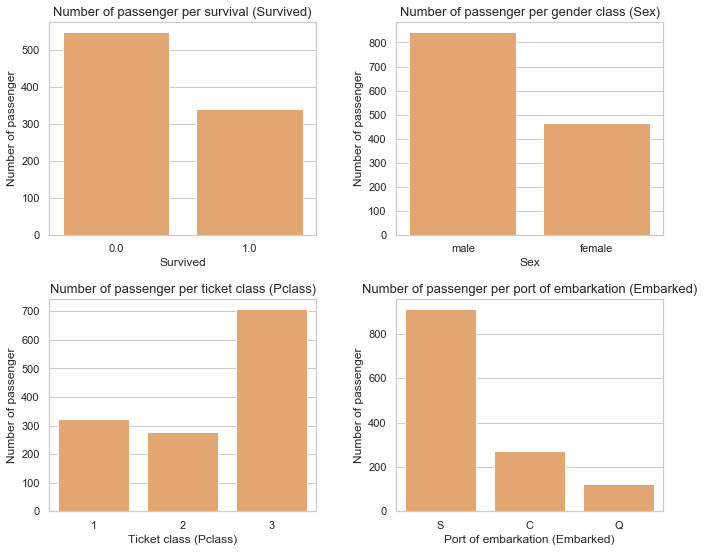

In [9]:
plt.figure(figsize=(11,9))

# Creating univariate distribution of Survived feature
plt.subplot(221)
sns.countplot(df_combine['Survived'], color='sandybrown')
plt.ylabel('Number of passenger')
plt.xlabel('Survived')
plt.title('Number of passenger per survival (Survived)', size=13)

# Creating univariate distribution of Sex feature
plt.subplot(222)
sns.countplot(df_combine['Sex'], color='sandybrown')
plt.ylabel('Number of passenger')
plt.xlabel('Sex')
plt.title('Number of passenger per gender class (Sex)', size=13)

# Creating univariate distribution of Pclass feature
plt.subplot(223)
sns.countplot(df_combine['Pclass'], color='sandybrown')
plt.ylabel('Number of passenger')
plt.xlabel('Ticket class (Pclass)')
plt.title('Number of passenger per ticket class (Pclass)', size=13)

# Creating univariate distribution of Embarked feature
plt.subplot(224)
sns.countplot(df_combine['Embarked'], color='sandybrown')
plt.ylabel('Number of passenger')
plt.xlabel('Port of embarkation (Embarked)')
plt.title('Number of passenger per port of embarkation (Embarked)', size=13)

# Adjusting the spaces between graphs
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

plt.show()

Based on the charts above, we can observe the following:
- The number of passengers that were not survived is more than the number of passengers that were survived.
- There were more males than females in the ship. 
- Most passengers were in the third class. 
- Most passengers embarked from Southampton. 

There seems to be no abnormal values from these categorical features. Therefore, no value correction is necessary. 

### Univariate distributions of numerical features

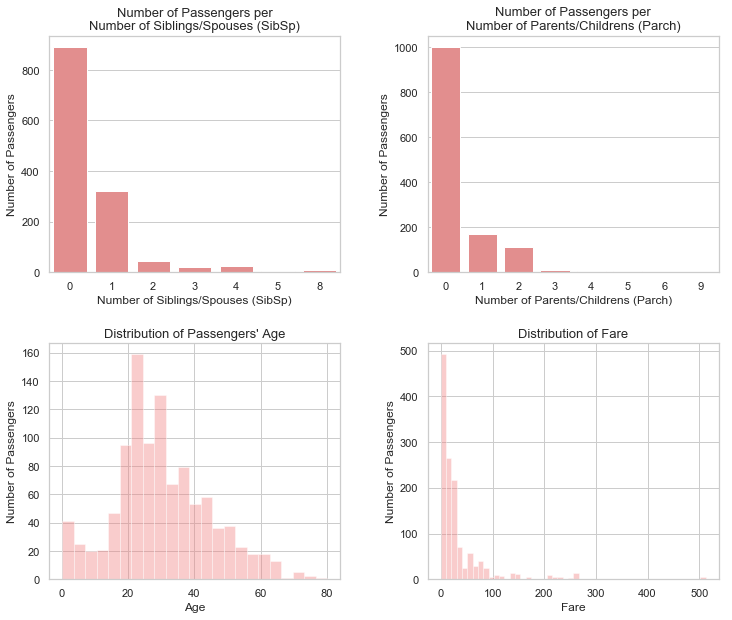

In [10]:
plt.figure(figsize=(12,10))

# Creating univariate distribution of 'SibSp' feature
plt.subplot(221)
sns.countplot(df_combine['SibSp'], color='lightcoral')
plt.ylabel('Number of Passengers')
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.title('Number of Passengers per\nNumber of Siblings/Spouses (SibSp)', size=13)

# Creating univariate distribution of 'Parch' feature
plt.subplot(222)
sns.countplot(df_combine['Parch'], color='lightcoral')
plt.ylabel('Number of Passengers')
plt.xlabel('Number of Parents/Childrens (Parch)')
plt.title('Number of Passengers per\nNumber of Parents/Childrens (Parch)', size=13)

# Creating univariate distribution of 'Age' feature
plt.subplot(223)
sns.distplot(df_combine['Age'].dropna(), color='lightcoral', kde=False, norm_hist=False)
plt.ylabel('Number of Passengers')
plt.xlabel('Age')
plt.title('Distribution of Passengers\' Age', size=13)

# Creating univariate distribution of 'Fare' feature
plt.subplot(224)
sns.distplot(df_combine['Fare'].dropna(), color='lightcoral', kde=False, norm_hist=False)
plt.ylabel('Number of Passengers')
plt.xlabel('Fare')
plt.title('Distribution of Fare', size=13)

plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

plt.show()

Based on the charts above, we can observe the following:
- The distribution of ***SibSp*** feature is skewed with most passengers did not have any siblings or spouses aboard the Titanic. Only a few passengers had siblings/spouses more than one. The value range is still acceptable and there seemes to be no abnormal, inaccurate, or non-acceptable values. 
- The distribution of ***Parch*** feature is skewed with most passengers did not have any parents or childrens aboard the Titanic. Only a few passengers had parents/children more than one. The value range is still acceptable and there seemes to be no abnormal, inaccurate, or non-acceptable values. 
- The distribution of ***Age*** resembles a normal distribution. Most passengers were between 20 and 40 years old. The maximum age of a passenger is 80 years old. The value range is still acceptable and there seemes to be no abnormal, inaccurate, or non-acceptable values. 
- The distribution of ***Fare*** feature is skewed with most passengers paid fare between £0 to £100. The maximum fare paid by a passenger was £512. It is stated in this [article](https://www.quora.com/What-were-the-ticket-prices-to-board-the-Titanic) that the cost of tickets to board the Titanic were:
    - First Class (parlor suite) — £870
    - First Class (berth)— £30
    - Second Class — £12
    - Third Class — £3 to £8
- Based on the above information, the value range of ***Fare*** feature is still acceptable.

Based on these observations, there seems to be no abnormal values from these numerical features. Therefore, no value correction is necessary.

<a id='section 3.2.'></a>

## 3.2. Handling outliers
An outlier is an observation point that is distant from other observations. Outliers in data can distort predictions and affect the accuracy, if we do not detect and handle them. There are several techniques to detect outliers. This [article](https://medium.com/@mehulved1503/effective-outlier-detection-techniques-in-machine-learning-ef609b6ade72) discusses some common techniques to detect outliers. 

In this tutorial, we use **the box plot rule**. The box plot rule states that for a given numerical variable, outliers are those observations that lie outside 1.5 * IQR, where IQR, the ‘Inter Quartile Range’ is the difference between 75th and 25th quartiles. To perform outliers identification using the box plot rule, we plot all of the numerical features using box plot. 

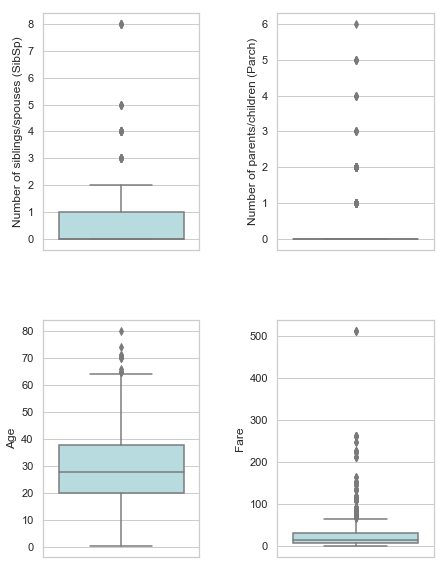

In [11]:
plt.figure(figsize=(7,10))

# Creating boxplot of 'SibSp' feature
plt.subplot(221)
sns.boxplot(x='SibSp', data=df_train, color='powderblue', orient='v')
plt.ylabel('Number of siblings/spouses (SibSp)')

# Creating boxplot of 'Parch' feature
plt.subplot(222)
sns.boxplot(x='Parch', data=df_train, color='powderblue', orient='v')
plt.ylabel('Number of parents/children (Parch)')

# Creating boxplot of 'Age' feature
plt.subplot(223)
sns.boxplot(x='Age', data=df_train, color='powderblue', orient='v')

# Creating boxplot of 'Fare' feature
plt.subplot(224)
sns.boxplot(x='Fare', data=df_train, color='powderblue', orient='v')

plt.subplots_adjust(hspace = 0.3, wspace = 0.5)

plt.show()

Based on the charts above, we can observe the following:
- In ***SibSp*** feature, values bigger than 2 are considered as outliers.
- In ***Parch*** feature, values bigger than 0 are considered as outliers.
- In ***Age*** feature, values bigger than 64 are considered as outliers.
- In ***Fare*** feature, values bigger than 70 are considered as outliers.

We are still not sure what to do with these outliers. Thus, we will perform [exploratory analysis](#section 4.0.) before deciding what to do with the identified outliers.  

<a id='section 3.3.'></a>

## 3.3. Handling missing data
Most machine learning algorithms cannot handle missing values. Therefore, it is important to identify feature(s) that contain missing values in order for us to fix them before performing data modelling. 

### Identifying missing data in the training and test dataset

We call the following to identify missing data in the training and test dataset:

In [12]:
# Identifying missing data in the training and test dataset
pd.DataFrame({'Number of Missing Values (Training)': df_train.isna().sum(), 
              '% of Missing Values (Training)': (df_train.isna().sum()/df_train.shape[0] * 100).round(2),
              'Number of Missing Values (Test)': df_test.isna().sum().round(0), 
              '% of Missing Values (Test)': (df_test.isna().sum()/df_test.shape[0] * 100).round(2)})

,Number of Missing Values (Training),% of Missing Values (Training),Number of Missing Values (Test),% of Missing Values (Test)
Age,177,19.87,86.0,20.57
Cabin,687,77.10,327.0,78.23
Embarked,2,0.22,0.0,0.00
Fare,0,0.00,1.0,0.24
Name,0,0.00,0.0,0.00
Parch,0,0.00,0.0,0.00
Pclass,0,0.00,0.0,0.00
Sex,0,0.00,0.0,0.00
SibSp,0,0.00,0.0,0.00
Survived,0,0.00,NaN,NaN


Based on the observation, ***Age***, ***Cabin***, ***Embarked***, and ***Fare*** contain some missing values.

After we identfy features with missing values, we need to do something to handle these missing values. Alvira Swalin writes a comprehensive post about how to handle missing data in this [link](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4). The summary of this post can be illustrated by the following image:

![link](handling missing data.png)

We decide to impute missing entries in ***Cabin***, ***Age*** and ***Embarked*** feature. 

<a id='Imputing missing values in Cabin feature'></a>

### Imputing missing values in *Cabin* feature
Passengers who have missing values in ***Cabin*** feature are assumed to not have Cabin in the ship. So, we impute the missing values with *Z*, which indicates passengers with no cabin.  

In [13]:
# Imputing 'Cabin' feature
df_train['Cabin'].fillna('Z', inplace=True)
df_test['Cabin'].fillna('Z', inplace=True)

To test our assumption, let' see the ticket class (***Pclass***) distribution of *Z* (i.e., no cabin) compared to the other cabins.

In [14]:
df_combine['Cabin'] = df_train['Cabin'].str.get(0)
df_combine.groupby('Cabin')['Pclass'].value_counts().to_frame('Count')

Count
Cabin Pclass       
A     1          15
B     1          47
C     1          59
D     1          29
      2           4
E     1          25
      2           4
      3           3
F     2           8
      3           5
G     3           4
T     1           1
Z     3         479
      2         168
      1          40

It can be seen that most passengers with *Z* value were in the 3rd class.  This strengthens our previous assumption that the missing values in the ***Cabin*** feature indicates passengers with no cabin. 

### Imputing missing values in *Embarked* feature

Before imputing missing values in ***Embarked***, we should see the missing values in the dataset.

In [15]:
# Viewing rows that contain missing values in 'Embarked' feature
df_train.loc[df_train['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Out of curiousity, I searched about Mrs. George Nelson (Martha Evelyn) and found this in this [link](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html):

*"Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard."*

So, we can impute the missing values as *S*.

In [16]:
# Imputing 'Embarked' feature
df_train.loc[df_train['Embarked'].isna(), 'Embarked'] = 'S'

### Imputing missing values in ***Fare*** feature
Before imputing missing values in ***Fare*** feature, we should see the missing value in the dataset.

In [17]:
# Viewing rows that contain missing values in 'Fare' feature
df_test.loc[df_test['Fare'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Z,S


To impute this missing value, we use the mean of ***Fare*** feature.

In [18]:
# Imputing 'Fare' feature
df_test.loc[df_test['Fare'].isna()] = df_train['Fare'].mean()

### Imputing missing values in *Age* feature

To impute missing values in ***Age***, we use linear regression. Linear regression “theoretically” provides good estimates for missing values. The feature with missing data, which is ***Age***, becomes the dependent variable. To identify the appropriate independent variables/predictors, we use features that have high correlation with ***Age***. To do that, we use correlation matrix. 

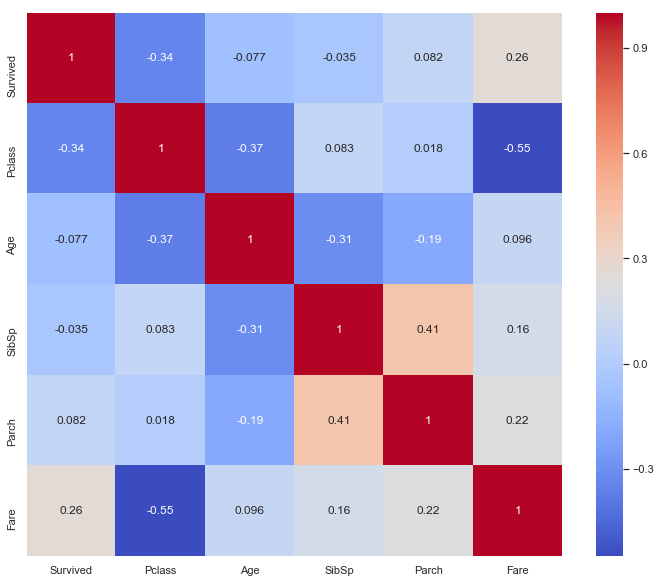

In [19]:
plt.figure(figsize=(12,10))

# Creating correlation matrix
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')

plt.show()

Based on the correlation matrix, we can see that the ***Age*** feature has some correlations with ***SibSp*** and ***Pclass*** feature. Thus, we make ***SibSp*** and ***Pclass*** as the predictors to predict the missing values in ***Age*** feature.

Instances with complete data are used for training the linear regression model. The generated model is then used to predict missing values for incomplete instances.

In [20]:
# Creating 'df_age', which contains instances with complete data 
# and will be the training data for the linear regression model
df_age = df_train.loc[~df_train['Age'].isna()]

# Initiating linear regression model
reg = LinearRegression()

# Training linear regression model
reg.fit(df_age[['SibSp', 'Pclass']], df_age['Age'])

# Predicting 'Age' feature by using linear regression model
pred_age_train = pd.Series(reg.predict(df_train[['SibSp', 'Pclass']]), index=df_train.index)
pred_age_test = pd.Series(reg.predict(df_test[['SibSp', 'Pclass']]), index=df_test.index)

# Filling missing values based on the predicted 'Age' values
df_train['Age'].fillna(pred_age_train, inplace=True)
df_test['Age'].fillna(pred_age_test, inplace=True)

To check the result, we can check the distribution of ***Age***.

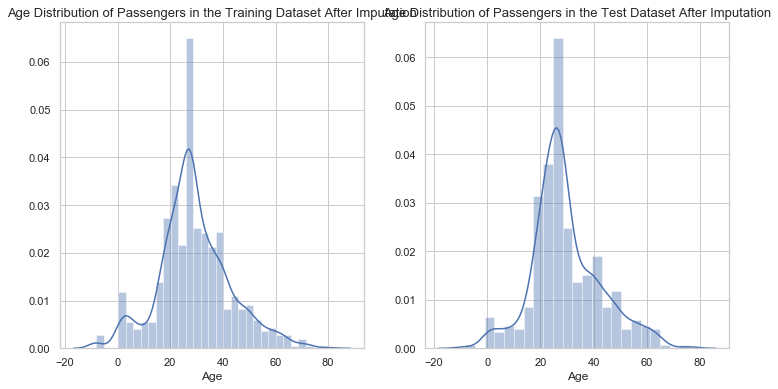

In [21]:
plt.figure(figsize=(12,6))

# Creating histogram of 'Age' feature from the training set
plt.subplot(121)
sns.distplot(df_train['Age'])
plt.title('Age Distribution of Passengers in the Training Dataset After Imputation', size=13)

# Creating histogram of 'Age' feature from the test set
plt.subplot(122)
sns.distplot(df_test['Age'])
plt.title('Age Distribution of Passengers in the Test Dataset After Imputation', size=13)

plt.show()

The result seems a little bit odd because there are some negative values in the distribution. To check which instances have negative values, we call the following:

In [22]:
# Checking instances that have negative value in the training dataset
df_train.loc[df_train['Age'] < 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,-8.236283,8,2,CA. 2343,69.55,Z,S
181,0,3,"Sage, Miss. Constance Gladys",female,-8.236283,8,2,CA. 2343,69.55,Z,S
202,0,3,"Sage, Mr. Frederick",male,-8.236283,8,2,CA. 2343,69.55,Z,S
325,0,3,"Sage, Mr. George John Jr",male,-8.236283,8,2,CA. 2343,69.55,Z,S
793,0,3,"Sage, Miss. Stella Anna",female,-8.236283,8,2,CA. 2343,69.55,Z,S
847,0,3,"Sage, Mr. Douglas Bullen",male,-8.236283,8,2,CA. 2343,69.55,Z,S
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,-8.236283,8,2,CA. 2343,69.55,Z,S


In [23]:
# Checking instances that have negative value in the test dataset
df_test.loc[df_test['Age'] < 0]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1080,3.0,"Sage, Miss. Ada",female,-8.236283,8.0,2.0,CA. 2343,69.55,Z,S


To handle these negative values, we replace these values with the mean of the ***Age*** feature.

In [24]:
# Replacing instances that have negative value with the mean of the 'Age' feature
df_train.loc[df_train['Age'] < 0, 'Age'] = df_train['Age'].mean()
df_test.loc[df_test['Age'] < 0, 'Age'] = df_train['Age'].mean()

We also round values in the ***Age*** feature because we do not need values with high amount of precision.

In [25]:
# Rounding values in the 'Age' feature
df_train['Age'] = df_train['Age'].round().astype('int')
df_test['Age'] = df_test['Age'].round().astype('int')

<a id='section 3.4.'></a>

## 3.4. Creating new features from existing features

We can use existing features to create new features to determine if they contribute to predict our outcome. For this dataset, we create the following features from the existing features:
- [***Title***](#Title)
- [***SibSp+Parch***](#SibSp+Parch)
- [***IsAlone***](#IsAlone)
- [***FamilySurvival***](#FamilySurvival)

Each is discussed in the following:

<a id='Title'></a>

### Creating ***Title*** feature
We can extract the title of passengers (e.g., Mr., Miss, Mrs., etc.) from the ***Name*** features and make it a feature named ***Title***. To do that, we call the following:

In [26]:
# Creating 'Title' feature
df_train['Title'] = df_train['Name'].str.split(',', expand=True)[1].str.split('.').str.get(0)
df_test['Title'] = df_test['Name'].str.split(',', expand=True)[1].str.split('.').str.get(0)

Let's see the distribution of passenger's title:

In [27]:
# Viewing the distribution of 'Title' feature
df_train['Title'].value_counts().to_frame('Number of Passengers').T

,Mr,Miss,Mrs,Master,Dr,Rev,Col,Mlle,Major,Lady,Mme,Don,the Countess,Capt,Sir,Ms,Jonkheer
Number of Passengers,517,182,125,40,7,6,2,2,2,1,1,1,1,1,1,1,1


We can observe that *Mr*, *Miss*, and *Mrs* were the most common passenger's title while other titles have a very rare occurrence. Directly using these features can cause a lot of issues and adversely affect the analysis and machine learning models. Thus, titles with rare occurrences, such as *Capt*, *Lady*, and *Sir*, should be binned together. We will perform [exploratory data analysis](#section 4.0.) before deciding whether to bin rare titles together or not.

<a id='SibSp+Parch'></a>

### Creating *SibSp+Parch* feature
We add the number of siblings/spouses (***SibSp***) and the number of parents/children (***Parch***) and make it a feature named ***SibSp+Parch***.  

In [28]:
# Creating 'SibSp+Parch' feature
df_train['SibSp+Parch'] = df_train['SibSp'] + df_train['Parch'] 
df_test['SibSp+Parch'] = df_test['SibSp'] + df_test['Parch'] 

<a id='IsAlone'></a>

### Creating *IsAlone* feature
***IsAlone*** feature determines whether a passenger had siblings/spouses and/or parents/children. If a passenger did not have any siblings/spouses and/or parents/children, ***IsAlone*** = 1. And if a passenger had any siblings/spouses and/or parents/children, ***IsAlone*** = 0. 

In [29]:
# Creating 'IsAlone' feature
df_train['IsAlone'] = df_train['SibSp+Parch'].map(lambda x: 1 if x == 0 else 0)
df_test['IsAlone'] = df_test['SibSp+Parch'].map(lambda x: 1 if x == 0 else 0)

<a id='FamilySurvival'></a>

### Creating *FamilySurvival* feature

Note: this part is taken from a kernel created by [S.Xu](https://www.kaggle.com/shunjiangxu/blood-is-thicker-than-water-friendship-forever). 

***FamilySurvival*** feature indicates if the passenger had any family members that are survived/not-survived. The assumption is that members of a family would survive or perish together. 

First, we use passenger's last name to divide the passengers into families. Thus, we create a feature named ***Last_Name*** by calling the following:

In [30]:
train_size = df_train.shape[0]
test_size = df_test.shape[0]
df_combine = df_train.append(df_test, sort=False)
df_combine['Last_Name'] = df_combine['Name'].str.split(',', expand=True)[0]

If we closely examine the data, members of a family paid the same fare for the tickets. To show this, we call the following:

In [31]:
fare_df = df_combine.loc[df_combine['SibSp+Parch'] > 0, ['Last_Name', 'Fare', 'SibSp+Parch']]
fare_diff = (fare_df.groupby(['Last_Name', 'SibSp+Parch'])['Fare'].aggregate('max') - fare_df.groupby(['Last_Name', 'SibSp+Parch'])['Fare'].aggregate('min')).value_counts()
print('Percentage of families with the same fare: {:.2f}%'.format(fare_diff[0]/fare_diff.sum()*100))

Percentage of families with the same fare: 93.39%


This suggests the fare was for a whole family, not per individual. We can use both last name and fare to group passengers into families in case different families with the same last name.

To see if the assumption that members of a family would survive or perish together, we call the following:

In [32]:
train_temp_df = df_combine.iloc[:train_size]
family_group_df = train_temp_df.loc[train_temp_df['SibSp+Parch']>0, 
                                    ['Last_Name', 'Fare', 'SibSp+Parch', 'Survived']].groupby(['Last_Name', 'Fare'])
family_df = pd.DataFrame(data=family_group_df.size(), columns=['Size_in_training_dataset'])
family_df['Survived_Total'] = family_group_df['Survived'].sum().astype('int')
family_df['SibSp+Parch'] = family_group_df['SibSp+Parch'].mean().astype('int')
all_survived = (family_df['Size_in_training_dataset'] == family_df['Survived_Total']).sum()/len(family_df)*100
print('Families with the whole members survived: {:.1f}%'.format(all_survived))
all_not_survived = (family_df['Survived_Total']==0).sum()/len(family_df)*100
print('Families with the whole members not survived: {:.1f}%'.format(all_not_survived))

Families with the whole members survived: 44.7%
Families with the whole members not survived: 35.7%


We can infer that majority family either all perished or all survived.

To create ***FamilySurvival*** feature, we call the following:

In [33]:
df_combine['FamilySurvival'] = 0.5

for _, grp_df in df_combine[['Survived', 'Last_Name', 'Fare']].groupby(['Last_Name', 'Fare']):
    if len(grp_df) > 1:
        for ind, row in grp_df.iterrows():
            ## Finding out if any family members survived or not
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            ## If any family members survived, put this feature as 1
            if smax == 1: 
                df_combine.loc[ind, 'FamilySurvival'] = 1
            ## Otherwise if any family members perished, put this feature as 0
            elif smin == 0: 
                df_combine.loc[ind, 'FamilySurvival'] = 0

In addition to family, if we examine the data closely, we will see there are groups of people with same ticket number, and they pay the same fare. This suggests group of friends are travelling together. One will think these friends will help each other and will survive or perish at the same time. We will explore this information here.

In [34]:
train_temp_df = df_combine.iloc[:train_size]
ticket_group_df = train_temp_df.groupby('Ticket')
ticket_df = pd.DataFrame(data=ticket_group_df.size(), columns=['Size_in_training_dataset'])
ticket_df['Survived_Total'] = ticket_group_df['Survived'].sum().astype('int')
ticket_df['Not_Family'] = ticket_group_df['Last_Name'].unique().apply(len)
ticket_df = ticket_df.loc[(ticket_df['Size_in_training_dataset'] > 1) & (ticket_df['Not_Family'] > 1)]
print('Number of groups in training set that is not family: {}'.format(len(ticket_df)))
all_survived = (ticket_df['Size_in_training_dataset'] == ticket_df['Survived_Total']).sum()/len(ticket_df)*100
print('Families with the whole members survived: {:.1f}%'.format(all_survived))
all_not_survived = (ticket_df['Survived_Total'] == 0).sum()/len(ticket_df)*100
print('Families with the whole members not survived: {:.1f}%'.format(all_not_survived))

Number of groups in training set that is not family: 44
Families with the whole members survived: 36.4%
Families with the whole members not survived: 29.5%


We will overload the ***Family survival*** feature instead of creating a separate feature.

In [35]:
for grp, grp_df in df_combine.groupby('Ticket'):
    if len(grp_df) > 1:
        for ind, row in grp_df.iterrows():
            if (row['FamilySurvival']) == 0 or (row['FamilySurvival'] == 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                if smax == 1:
                    df_combine.loc[ind, 'FamilySurvival'] = 1
                elif smin == 0:
                    df_combine.loc[ind, 'FamilySurvival'] = 0

df_train['FamilySurvival'] = df_combine.iloc[:train_size]['FamilySurvival']
df_test['FamilySurvival'] = df_combine.iloc[train_size:]['FamilySurvival']

We will also fix the ***Fare*** feature, so it will reflect the price paid by a passenger. We call the following:

In [36]:
df_combine['RealFare'] = 0

for _, grp_df in df_combine.groupby(['Ticket']):
    grp_size = len(grp_df)
    for ind, row in grp_df.iterrows():
        real_fare = row['Fare']/grp_size
        df_combine.loc[ind, 'RealFare'] = real_fare

df_train['Fare'] = df_combine.iloc[:train_size]['RealFare']
df_test['Fare'] = df_combine.iloc[train_size:]['RealFare']

<a id='section 3.5.'></a>

## 3.5. Converting data types
Most machine learning algorithms require all features to be converted into some numeric representations that can be understood by these algorithms. Categorical features cannot be processed directly by the algorithms and conversions on these features shall be done before subsequent data processing. Therefore, knowing the data type of all features helps us in deciding which feature(s) need conversion to other data type. We call the following to see the data type pf each feature in the dataset:

In [37]:
# Viewing data type of each feature in the dataset
df_train.dtypes.to_frame(name='Data type')

,Data type
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,int64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


We can observe that seven features have integer data type, i.e., ***Survived***, ***Pclass***, ***Age***, ***SibSp***, ***Parch***, ***SibSp+Parch***, and ***IsAlone***. Two features have float data type, i.e., ***FamilySurvival*** and ***Fare***. And six features have object (string) data type, i.e., ***Name***, ***Sex***, ***Ticket***, ***Cabin***, ***Embarked***, and ***Title***.

Based on these observations, we need to convert features that have object (string) data type into numerical data type. 
- ***Name*** and ***Ticket*** feature will be removed because they will not be used anymore in the subsequent analysis.
- For ***Sex*** feature, we will replace the values with binary numbers. *male* is replaced by 1 and *female* by 0. 
- ***Embarked*** feature is considered as a ordinal categorical feature because Titanic embarked these three ports in a sequence. It went to Southampton, then Cherbourg, and finally Queenstown. Thus, *S* (representing Southampton) is replaced by 0, *C* (representing Cherbourg) by 1, and *Q* (representing Queenstown) by 2. 
- For ***Title*** and ***Cabin*** feature, the conversion is a bit complex because they comprise of several categories and have no clear ordering of categories. We will think about how to convert these features after performing [exploratory data analysis](#section 4.0.).

**Converting *Sex* feature data type**

In [38]:
# Converting 'Sex' feature data type
df_train.replace({'male': 1, 'female': 0}, inplace=True)
df_test.replace({'male': 1, 'female': 0}, inplace=True)

**Converting *Embarked* feature data type**

In [39]:
# Converting 'Embarked' feature data type
df_train.replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)
df_test.replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)

<a id='section 3.6.'></a>

## 3.6. Removing features that do not contribute to the analysis
***Name*** and ***Ticket*** feature will be removed because they will not be used anymore in the subsequent analysis. Thus, we drop them for our datasets by calling the following:

In [40]:
# Dropping 'Name' and 'Ticket' feature
df_train.drop(columns=['Name', 'Ticket'], inplace=True)
df_test.drop(columns=['Name', 'Ticket'], inplace=True)

<a id='section 4.0.'></a>

# 4.0. Exploratory Data Analysis
Exploratory data analysis (EDA) is an approach of performing initial investigations on our data. EDA normally has descriptive nature and uses graphical statistics to discover patterns, to identify anomalies, to test hypothesis, and to check assumptions regarding our data. In this section, we will perform EDA for each feature in our dataset. The focus is to find patterns and correlations between the independent features and the output feature (i.e., ***Survived***). Some feature engineering are performed based on EDA. 
- [4.1. Ticket Class (***Pclass***) EDA](#section 4.1.)
- [4.2. Gender (***Sex***) EDA](#section 4.2.)
- [4.3. Port of Embarkation (***Embarked***) EDA](#section 4.3.)
- [4.4. Passenger Is Alone (***IsAlone***) EDA](#section 4.4.)
- [4.5. Passenger's Title (***Title***) EDA](#section 4.5.)
- [4.6. Passenger's Age (***Age***) EDA](#section 4.6.)
- [4.7. Number of Siblings/Spouses (***SibSp***) EDA](#section 4.7.)
- [4.8. Number of Parents/Children (***Parch***) EDA](#section 4.8.)
- [4.9. Number of  Siblings/Spouses/Parents/Children (***SibSp+Parch***) EDA](#section 4.9.)
- [4.10.Ticket Price (***Fare***) EDA](#section 4.10.)
- [4.11.Passenger's Cabin (***Cabin***) EDA](#section 4.11.)
- [4.12.Correlation Among Features](#section 4.12.)

<a id='section 4.1.'></a>

## 4.1. Ticket Class (*Pclass*) EDA
For ticket class feature, let's visualize the following:
- Ticket class vs probability of survival (***Survived***)
- Ticket class and gender (***Sex***) vs probability of survival
- Ticket class and port of embarkation (***Embarked***) vs probability of survival
- Ticket class and passenger is alone (***IsAlone***) vs probability of survival

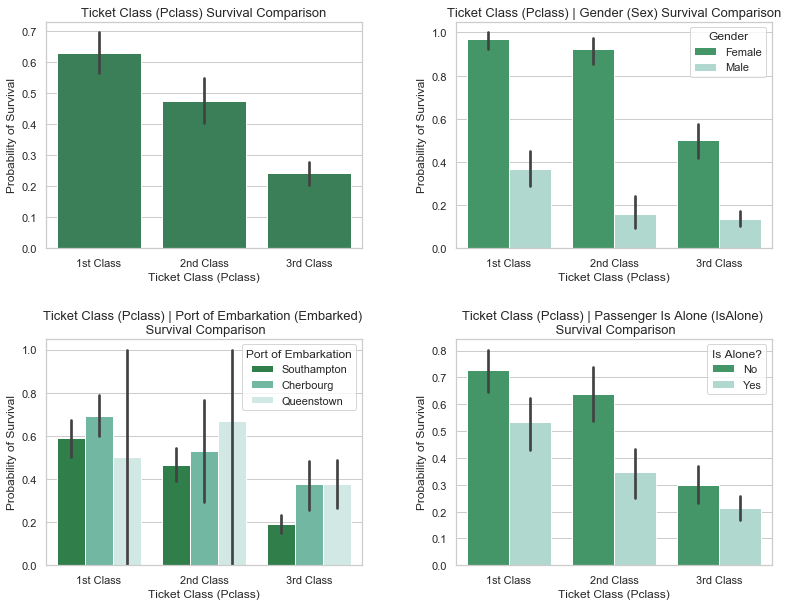

In [41]:
plt.figure(figsize=(13,10))

# Creating a bar chart of ticket class (Pclass) vs probability of survival (Survived)
ax1 = plt.subplot(221)
g1 = sns.barplot(x='Pclass', y='Survived', data=df_train, color='seagreen')
plt.ylabel('Probability of Survival')
plt.xlabel('Ticket Class (Pclass)')
ax1.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
plt.title('Ticket Class (Pclass) Survival Comparison', size=13)

# Creating a bar chart of ticket class (Pclass) and gender (Sex) vs probability of survival (Survived)
ax2 = plt.subplot(222)
g2 = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_train, palette='BuGn_r')
plt.ylabel('Probability of Survival')
plt.xlabel('Ticket Class (Pclass)')
ax2.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
handles, _ = g2.get_legend_handles_labels()
ax2.legend(handles, ['Female', 'Male'], title='Gender')
plt.title('Ticket Class (Pclass) | Gender (Sex) Survival Comparison', size=13)

# Creating a bar chart of ticket class (Pclass) and port of embarkation (Embarked) vs probability of survival (Survived)
ax3 = plt.subplot(223)
g3 = sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=df_train, palette='BuGn_r')
plt.ylabel('Probability of Survival')
plt.xlabel('Ticket Class (Pclass)')
ax3.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
handles, _ = g3.get_legend_handles_labels()
ax3.legend(handles, ['Southampton', 'Cherbourg', 'Queenstown'], title='Port of Embarkation')
plt.title('Ticket Class (Pclass) | Port of Embarkation (Embarked) \n Survival Comparison', size=13)

# Creating a bar chart of ticket class (Pclass) and passenger is alone (IsAlone) vs probability of survival (Survived)
ax4 = plt.subplot(224)
g4 = sns.barplot(x='Pclass', y='Survived', hue='IsAlone', data=df_train, palette='BuGn_r')
plt.ylabel('Probability of Survival')
plt.xlabel('Ticket Class (Pclass)')
ax4.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
handles, _ = g4.get_legend_handles_labels()
ax4.legend(handles, ['No', 'Yes'], title='Is Alone?')
plt.title('Ticket Class (Pclass) | Passenger Is Alone (IsAlone) \n Survival Comparison', size=13)

plt.subplots_adjust(hspace = 0.4, wspace = 0.3)

plt.show()

From the charts above, we can observe the following:
- Passengers with higher ticket class had higher probability of survival than passengers with lower ticket class. 
- Female passengers in the 1st and 2nd class had a considerably higher chance of survival (more than 85%) than female passengers in the 3rd class (only about 50%). 
- Male passengers in the 1st and 2nd class had a considerably higher chance of survival (~35%) than male passengers in the 2nd and 3rd class. Male passengers in the 2nd and 3rd class had only probability of survival less than 20%. 
- Passengers who embarked from Cherbourg and Queenstown were more likely to survive than passengers embarked from Southampton. 
- Passengers who boarded the ship with someone else were more likely to survive. This applies to all ticket classes. 

Based on these observations, it seems that the rescue was prioritized for passengers who had higher ticket class. We can infer that ***Pclass*** is an important feature to predict survival of passengers. 

<a id='section 4.2.'></a>

## 4.2. Gender (*Sex*) EDA
For gender feature, let's visualize the following:
- Gender vs probability of survival (***Survived***)
- Gender and ticket class (***Pclass***) vs probability of survival
- Gender and port of embarkation (***Embarked***) vs probability of survival
- Gender and passenger is alone (***IsAlone***) vs probability of survival

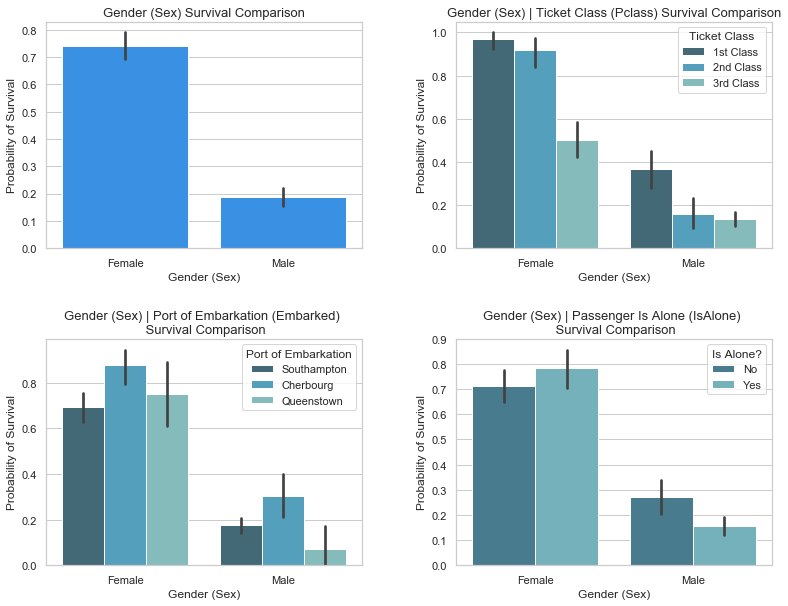

In [42]:
plt.figure(figsize=(13,10))

# Creating a bar chart of gender (Sex) vs probability of survival (Survived)
ax1 = plt.subplot(221)
g1 = sns.barplot(x='Sex', y='Survived', data=df_train, color='dodgerblue')
plt.ylabel('Probability of Survival')
plt.xlabel('Gender (Sex)')
ax1.set_xticklabels(['Female', 'Male'])
plt.title('Gender (Sex) Survival Comparison', size=13)

# Creating a bar chart of gender (Sex) and ticket class (Pclass) vs probability of survival (Survived)
ax2 = plt.subplot(222)
g2 = sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_train, palette='GnBu_d')
plt.ylabel('Probability of Survival')
plt.xlabel('Gender (Sex)')
ax2.set_xticklabels(['Female', 'Male'])
handles, _ = g2.get_legend_handles_labels()
ax2.legend(handles, ['1st Class', '2nd Class', '3rd Class'], title='Ticket Class')
plt.title('Gender (Sex) | Ticket Class (Pclass) Survival Comparison', size=13)

# Creating a bar chart of gender (Sex) and port of embarkation (Embarked) vs probability of survival (Survived)
ax3 = plt.subplot(223)
g3 = sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df_train, palette='GnBu_d')
plt.ylabel('Probability of Survival')
plt.xlabel('Gender (Sex)')
ax3.set_xticklabels(['Female', 'Male'])
handles, _ = g3.get_legend_handles_labels()
ax3.legend(handles, ['Southampton', 'Cherbourg', 'Queenstown'], title='Port of Embarkation')
plt.title('Gender (Sex) | Port of Embarkation (Embarked) \n Survival Comparison', size=13)

# Creating a bar chart of gender (Sex) and passenger is alone (IsAlone) vs probability of survival (Survived)
ax4 = plt.subplot(224)
g4 = sns.barplot(x='Sex', y='Survived', hue='IsAlone', data=df_train, palette='GnBu_d')
plt.ylabel('Probability of Survival')
plt.xlabel('Gender (Sex)')
ax4.set_xticklabels(['Female', 'Male'])
handles, _ = g4.get_legend_handles_labels()
ax4.legend(handles, ['No', 'Yes'], title='Is Alone?')
plt.title('Gender (Sex) | Passenger Is Alone (IsAlone) \n Survival Comparison', size=13)

plt.subplots_adjust(hspace = 0.4, wspace = 0.3)

plt.show()

From the charts above, we can observe the following:
- Female passengers had significantly higher chance of survival (more than 70%) than male passengers (~20%). 
- Female passengers in the 1st and 2nd class had a considerably higher chance of survival (more than 85%) than female passengers in the 3rd class (only about 50%). Meanwhile, male passengers in the 1st class had considerably higher chance of survival (about 36%) than male passengers in the 2nd and 3rd class. 
- Passengers who boarded the ship from Cherbourg had higher probability of survival than passengers who boarded the ship from Southampton and Queenstown. This applies for both male and female passengers.
- Female passengers who boarded the ship alone had a slightly better chance of survival than female passengers who boarded the ship with someone else. But, vice versa, male passengers who boarded the ship with someone else had higher probability of survival than male passengers who boarded the ship alone. 

Based on these observations, it seems that the rescue was prioritized for female passengers. We can infer that ***Sex*** is an important feature to predict survival of passengers.

<a id='section 4.3.'></a>

## 4.3. Port of Embarkation (*Embarked*) EDA
For port of embarkation feature, let's visualize the following:
- Port of embarkation vs probability of survival (***Survived***)
- Port of embarkation and ticket class (***Pclass***) vs probability of survival
- Port of embarkation and gender (***Sex***) vs probability of survival
- Port of embarkation and passenger is alone (***IsAlone***) vs probability of survival

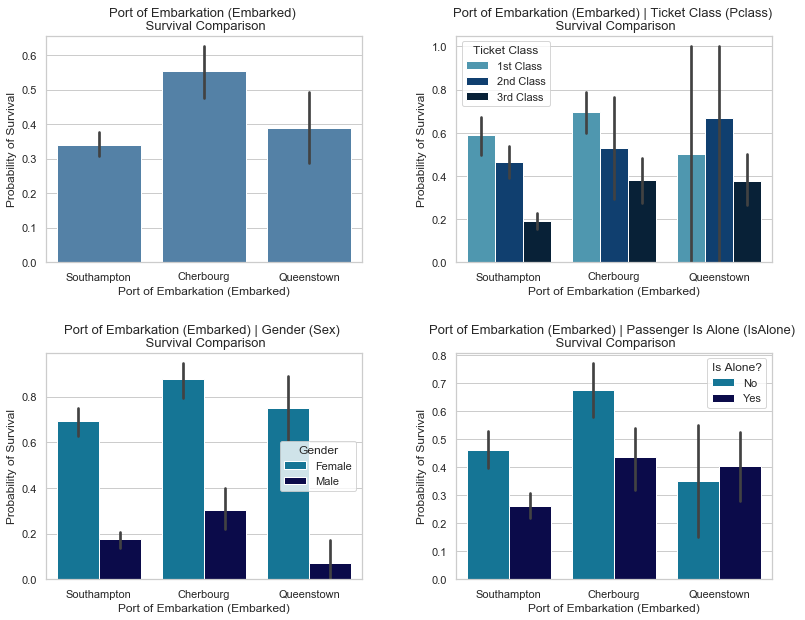

In [43]:
plt.figure(figsize=(13,10))

# Creating a bar chart of port of embarkation (Embarked) vs probability of survival (Survived)
ax1 = plt.subplot(221)
g1 = sns.barplot(x='Embarked', y='Survived', data=df_train, color='steelblue')
plt.ylabel('Probability of Survival')
plt.xlabel('Port of Embarkation (Embarked)')
ax1.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])
plt.title('Port of Embarkation (Embarked) \n Survival Comparison', size=13)

# Creating a bar chart of port of embarkation (Embarked) and ticket class (Pclass) 
# vs probability of survival (Survived)
ax2 = plt.subplot(222)
g2 = sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=df_train, palette='ocean_r')
plt.ylabel('Probability of Survival')
plt.xlabel('Port of Embarkation (Embarked)')
ax2.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])
handles, _ = g2.get_legend_handles_labels()
ax2.legend(handles, ['1st Class', '2nd Class', '3rd Class'], title='Ticket Class')
plt.title('Port of Embarkation (Embarked) | Ticket Class (Pclass) \n Survival Comparison', size=13)

# Creating a bar chart of port of embarkation (Embarked) and gender (Sex) vs probability of survival (Survived)
ax3 = plt.subplot(223)
g3 = sns.barplot(x='Embarked', y='Survived', hue='Sex', data=df_train, palette='ocean_r')
plt.ylabel('Probability of Survival')
plt.xlabel('Port of Embarkation (Embarked)')
ax3.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])
handles, _ = g3.get_legend_handles_labels()
ax3.legend(handles, ['Female', 'Male'], title='Gender')
plt.title('Port of Embarkation (Embarked) | Gender (Sex) \n Survival Comparison', size=13)

# Creating a bar chart of port of embarkation (Embarked) and passenger is alone (IsAlone) 
# vs probability of survival (Survived)
ax4 = plt.subplot(224)
g4 = sns.barplot(x='Embarked', y='Survived', hue='IsAlone', data=df_train, palette='ocean_r')
plt.ylabel('Probability of Survival')
plt.xlabel('Port of Embarkation (Embarked)')
ax4.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])
handles, _ = g4.get_legend_handles_labels()
ax4.legend(handles, ['No', 'Yes'], title='Is Alone?')
plt.title('Port of Embarkation (Embarked) | Passenger Is Alone (IsAlone) \n Survival Comparison', size=13)

plt.subplots_adjust(hspace = 0.4, wspace = 0.3)

plt.show()

From the charts above, we can observe the following:
- Passengers embarked from Cherbourg were more likely to survive than passengers embarked from Southampton and Queenstown. 
- 1st class passengers had higher probability of survival than 2nd class passengers. This applies to passengers embarked from Southampton and Cherbourg. But, 2nd class passengers were more likely to survive than 1st class passengers for people embarked from Queenstown. 
- Female passengers were more likely to survive than male passengers. This applies to all ports of embarkation. 
- Passengers embarked from Southampton and Cherbourg were more likely to survive if they boarded the ship with someone else. 

<a id='section 4.4.'></a>

## 4.4. Passenger Is Alone (*IsAlone*) EDA
For passenger is alone feature, let's visualize the following:
- Passenger is alone vs probability of survival (***Survived***)
- Passenger is alone and ticket class (***Pclass***) vs probability of survival
- Passenger is alone and gender (***Sex***) vs probability of survival
- Passenger is alone and port of embarkation (***Embarked***) vs probability of survival

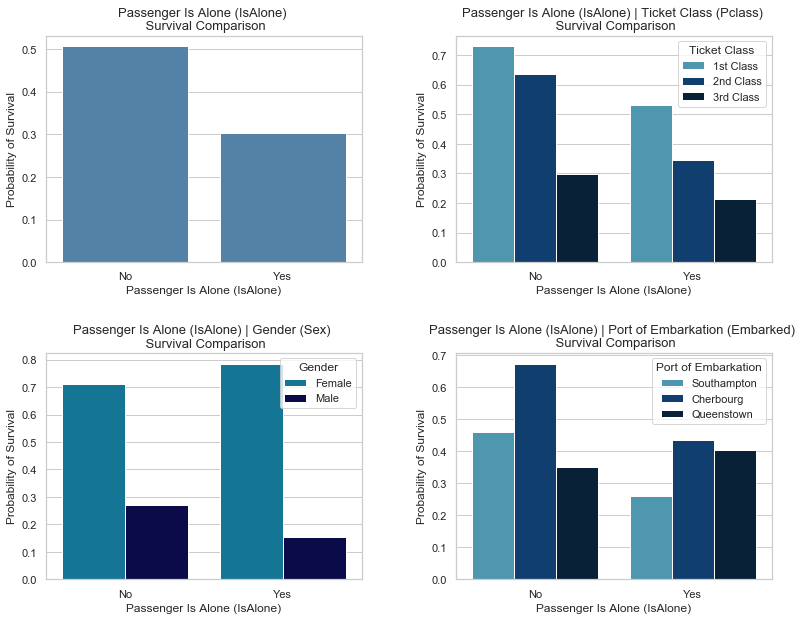

In [44]:
plt.figure(figsize=(13,10))

# Creating a bar chart of passenger is alone (IsAlone) vs probability of survival (Survived)
ax1 = plt.subplot(221)
g1 = sns.barplot(x='IsAlone', y='Survived', data=df_train, color='steelblue', ci = None)
plt.ylabel('Probability of Survival')
plt.xlabel('Passenger Is Alone (IsAlone)')
ax1.set_xticklabels(['No', 'Yes'])
plt.title('Passenger Is Alone (IsAlone) \n Survival Comparison', size=13)

# Creating a bar chart of passenger is alone (IsAlone) and ticket class (Pclass) 
# vs probability of survival (Survived)
ax2 = plt.subplot(222)
g2 = sns.barplot(x='IsAlone', y='Survived', hue='Pclass', data=df_train, palette='ocean_r', ci = None)
plt.ylabel('Probability of Survival')
plt.xlabel('Passenger Is Alone (IsAlone)')
ax2.set_xticklabels(['No', 'Yes'])
handles, _ = g2.get_legend_handles_labels()
ax2.legend(handles, ['1st Class', '2nd Class', '3rd Class'], title='Ticket Class')
plt.title('Passenger Is Alone (IsAlone) | Ticket Class (Pclass) \n Survival Comparison', size=13)

# Creating a bar chart of passenger is alone (IsAlone) and gender (Sex) vs probability of survival (Survived)
ax3 = plt.subplot(223)
g3 = sns.barplot(x='IsAlone', y='Survived', hue='Sex', data=df_train, palette='ocean_r', ci = None)
plt.ylabel('Probability of Survival')
plt.xlabel('Passenger Is Alone (IsAlone)')
ax3.set_xticklabels(['No', 'Yes'])
handles, _ = g3.get_legend_handles_labels()
ax3.legend(handles, ['Female', 'Male'], title='Gender')
plt.title('Passenger Is Alone (IsAlone) | Gender (Sex) \n Survival Comparison', size=13)

# Creating a bar chart of passenger is alone (IsAlone) and port of embarkation (Embarked) 
# vs probability of survival (Survived)
ax4 = plt.subplot(224)
g4 = sns.barplot(x='IsAlone', y='Survived', hue='Embarked', data=df_train, palette='ocean_r', ci = None)
plt.ylabel('Probability of Survival')
plt.xlabel('Passenger Is Alone (IsAlone)')
ax4.set_xticklabels(['No', 'Yes'])
handles, _ = g4.get_legend_handles_labels()
ax4.legend(handles, ['Southampton', 'Cherbourg', 'Queenstown'], title='Port of Embarkation')
plt.title('Passenger Is Alone (IsAlone) | Port of Embarkation (Embarked) \n Survival Comparison', size=13)

plt.subplots_adjust(hspace = 0.4, wspace = 0.3)

plt.show()

From the charts above, we can observe the following:
- Passengers who were travelling alone were less likely to survive than passengers who were travelling with someone else. 
- 1st class passengers were more likely to survive than 2nd class passengers, and 2nd class passengers were more likely to survive than 3rd class passengers. This applies for both passengers who were travelling alone and with someone else. 
- Female passengers were more likely to survive than male passengers. This applies for both passengers who were travelling alone and with someone else. 
- Passengers embarked from Southampton had higher survival chance than passengers embarked from Cherbourg and Queenstown. This applies for both passengers who were travelling alone and with someone else. 

<a id='section 4.5.'></a>

## 4.5. Passenger's Title (*Title*) EDA
We visualize passenger's title vs probability of survival (***Survived***):

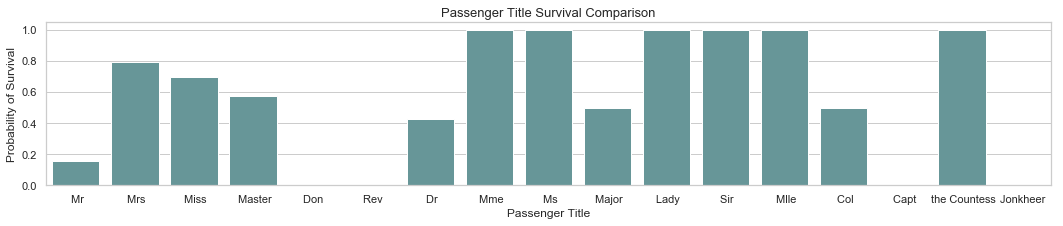

In [45]:
plt.figure(figsize=(18,3))

# Creating a bar chart of passenger's title (Title) vs probability of survival (Survived)
sns.barplot(x='Title', y='Survived', data=df_train, color='cadetblue', ci = None)
plt.ylabel('Probability of Survival')
plt.xlabel('Passenger Title')
plt.title('Passenger Title Survival Comparison', size=13)

plt.show()

From the chart above, we can observe the following:
- Passengers with title *Mme*, *Ms*, *Lady*, *Sir*, *Mlle*, *Col*, or *the Countess* had 100% chance of survival.
- No passengers with title *Don*, *Rev*, *Capt* or *Jonkheer* had survived. 
- Passengers with title *Mrs*, *Miss*, or *Master* had higher chance of survival than passengers with title *Mr*.

We have not checked the distribution of passenger's title, so let's check it by calling the following:

In [46]:
# Viewing the distribution of passenger's title ('Title') in the training dataset
df_train['Title'].value_counts().to_frame('Number of Passengers').T

,Mr,Miss,Mrs,Master,Dr,Rev,Col,Mlle,Major,Lady,Mme,Don,the Countess,Capt,Sir,Ms,Jonkheer
Number of Passengers,517,182,125,40,7,6,2,2,2,1,1,1,1,1,1,1,1


In [47]:
# Viewing the distribution of passenger's title ('Title') in the test dataset
df_test['Title'].value_counts().to_frame('Number of Passengers').T

,Mr,Miss,Mrs,Master,Col,Rev,Dr,Dona,Ms
Number of Passengers,239,78,72,21,2,2,1,1,1


*Mr*, *Miss*, and *Mrs* were the most common passenger's title while other titles have a very rare occurrence. Directly using these features can cause a lot of issues and adversely affect the analysis and machine learning models. 

Based on the above observations, we decide to bin title categories with count less than 10 into a new category named *Other*.  

In [48]:
# Binning titles with count less than 10 into a new category named 'Other'
df_train['Title'] = df_train['Title'].str.strip().map(lambda x: x if x == 'Mr' or x == 'Miss' or x == 'Mrs' or x == 'Master' else 'Other')
df_test['Title'] = df_test['Title'].str.strip().map(lambda x: x if x == 'Mr' or x == 'Miss' or x == 'Mrs' or x == 'Master' else 'Other')

After we bin some title categories together, let's visualize the following:
- Passenger's title vs probability of survival (***Survived***)
- Passenger's title and ticket class (***Pclass***) vs probability of survival
- Passenger's title and passenger is alone (***IsAlone***) vs probability of survival
- Passenger's title and port of embarkation (***Embarked***) vs probability of survival

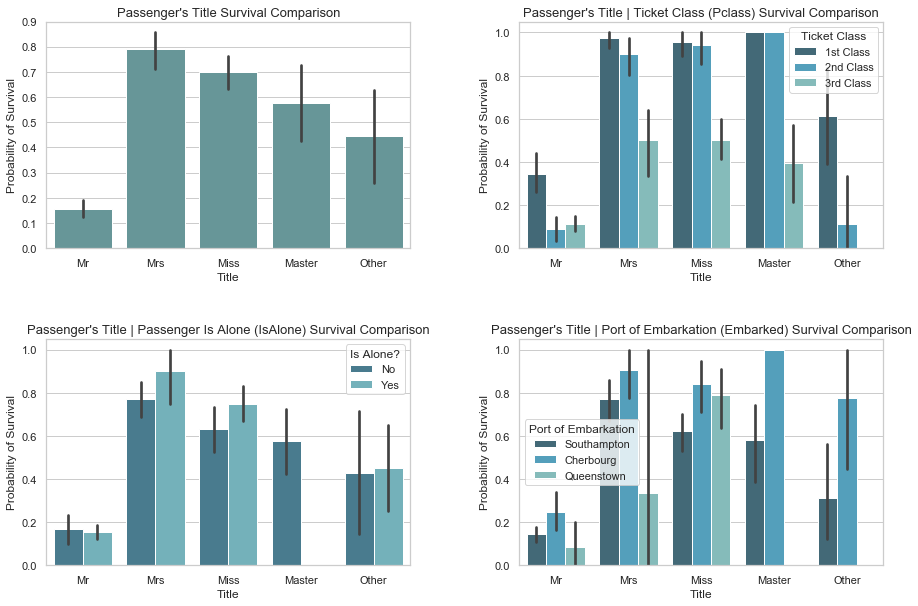

In [49]:
plt.figure(figsize=(15,10))

# Creating a bar chart of passenger's title (Title) vs probability of survival (Survived)
ax1 = plt.subplot(221)
g1 = sns.barplot(x='Title', y='Survived', data=df_train, color='cadetblue')
plt.ylabel('Probability of Survival')
plt.xlabel('Title')
plt.title('Passenger\'s Title Survival Comparison', size=13)

# Creating a bar chart of passenger's title (Title) and ticket class (Pclass) vs 
# probability of survival (Survived)
ax2 = plt.subplot(222)
g2 = sns.barplot(x='Title', y='Survived', hue='Pclass', data=df_train, palette='GnBu_d')
plt.ylabel('Probability of Survival')
plt.xlabel('Title')
handles, _ = g2.get_legend_handles_labels()
ax2.legend(handles, ['1st Class', '2nd Class', '3rd Class'], title='Ticket Class')
plt.title('Passenger\'s Title | Ticket Class (Pclass) Survival Comparison', size=13)

# Creating a bar chart of passenger's title (Title) and passenger is alone (IsAlone) vs 
# probability of survival (Survived)
ax3 = plt.subplot(223)
g3 = sns.barplot(x='Title', y='Survived', hue='IsAlone', data=df_train, palette='GnBu_d')
plt.ylabel('Probability of Survival')
plt.xlabel('Title')
handles, _ = g3.get_legend_handles_labels()
ax3.legend(handles, ['No', 'Yes'], title='Is Alone?')
plt.title('Passenger\'s Title | Passenger Is Alone (IsAlone) Survival Comparison', size=13)

# Creating a bar chart of passenger's title (Title) and port of embarkation (Embarked) vs 
# probability of survival (Survived)
ax4 = plt.subplot(224)
g4 = sns.barplot(x='Title', y='Survived', hue='Embarked', data=df_train, palette='GnBu_d')
plt.ylabel('Probability of Survival')
plt.xlabel('Title')
handles, _ = g4.get_legend_handles_labels()
ax4.legend(handles, ['Southampton', 'Cherbourg', 'Queenstown'], title='Port of Embarkation')
plt.title('Passenger\'s Title | Port of Embarkation (Embarked) Survival Comparison', size=13)

plt.subplots_adjust(hspace = 0.4, wspace = 0.3)

plt.show()

From the charts above, we can observe the following:
- Passengers with title *Mrs* had the highest survival chance while passengers with title *Mr* had the lowest survival chance. 
- Among passengers with title *Mr*, 1st class passengers had higher chance of survival than 2nd and 3rd class passengers. Among passengers with title *Mrs*, *Miss*, and *Master*, 1st class and 2nd class passengers had similar chance of survival. They were more likely to survive than 3rd class passengers. Among passenger with *Other* title, 1st class passengers had significantly higher likelihood to survive than 2nd class passengers. 
- Passengers with title *Master* had 100% chance of survival if they boarded 1st and 2nd class. 

Let's check the data type of ***Title*** feature:

In [50]:
# Checking the data type of 'Title' feature
df_train['Title'].dtype

dtype('O')

The ***Title*** feature is still in a object (string) data type. We need to tranform it to numerical data type. This feature has no intrinsic ordering to the categories (i.e., nominal categorical feature). 

There are several methods to transform nominal categorical features. Dipanjan Sarkar writes comprehensive discussions about these methods in this [article](https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63). For now, we will use **dummy coding scheme** to transform ***Title*** feature. The coding scheme encodes or transforms the attribute into **m** binary features which can only contain a value of 1 or 0. Each observation in the categorical feature is thus converted into a vector of size m with only one of the values as 1 (indicating it as active). We perform dummy coding scheme to ***Title*** feature by calling the following:  

In [51]:
# Performing dummy coding scheme to 'Title' feature
df_train = df_train.join(pd.get_dummies(df_train['Title'], prefix='Title'), how='outer')
df_test = df_test.join(pd.get_dummies(df_test['Title'], prefix='Title'), how='outer')

We do not need the original ***Title*** feature, so we will drop it.

In [52]:
# Dropping 'Title' feature
df_train.drop(columns=['Title'], inplace=True)
df_test.drop(columns=['Title'], inplace=True)

<a id='section 4.6.'></a>

## 4.6. Passenger's Age (*Age*) EDA
We visualize passenger's age vs probability of survival (***Survived***) by calling the following:

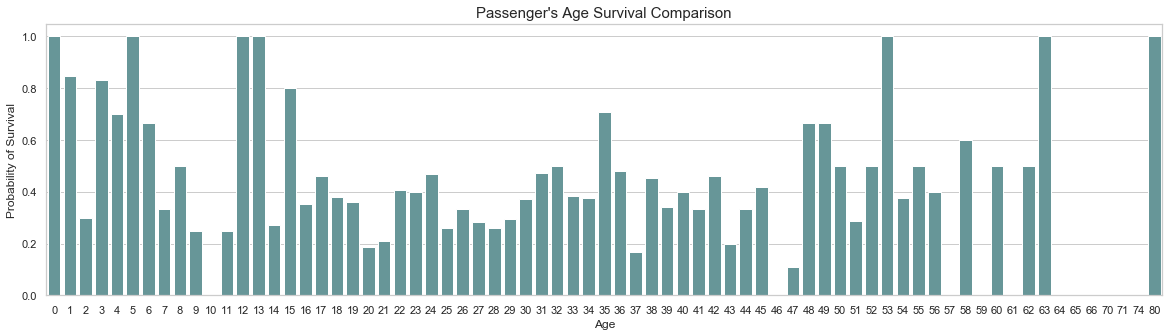

In [53]:
plt.figure(figsize=(20,5))

# Creating a bar chart of passenger's age (Age) vs probability of survival (Survived)
sns.barplot(x='Age', y='Survived', data=df_train, ci=True, color='cadetblue')
plt.ylabel('Probability of Survival')
plt.title('Passenger\'s Age Survival Comparison', size=15)

plt.show()

We can observe that it is difficult to see any patterns from the above bar plot. At a glimpse, there is no relationships/correlations between the ***Age*** feature and the probability of survival. Thus, we will segment ***Age*** feature into some segments to find meaningful patterns in the ***Age*** feature. 

In the first trial, we will segment ***Age*** feature into equal-width bins of width 5. We will name this segmentation as ***Age_binned*** feature. Let's try to visualize ***Age_binned*** vs probability of survival (***Survived***):

In [54]:
# Binning 'Age' feature
df_train['Age_binned'] = pd.cut(df_train['Age'], np.arange(0, 85, 5), include_lowest=True)
df_test['Age_binned'] = pd.cut(df_test['Age'], np.arange(0, 85, 5), include_lowest=True)

Let's try to visualize ***Age_binned*** vs probability of survival (***Survived***):

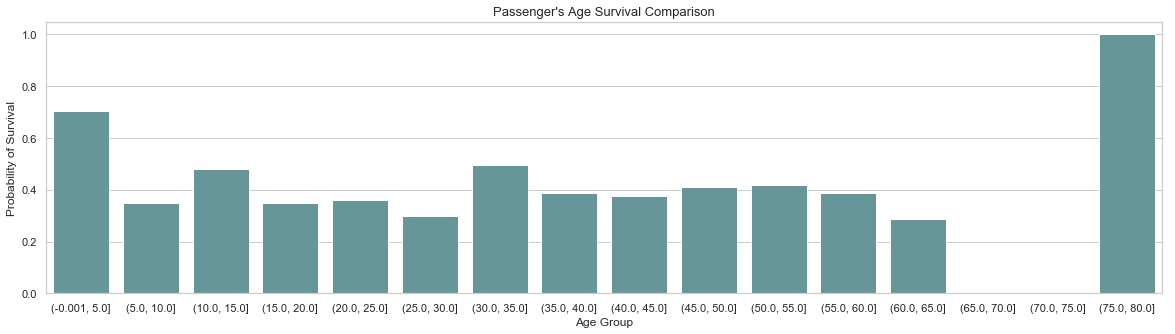

In [55]:
# Creating a bar chart of passenger's age group (Age_binned) vs probability of survival (Survived)
plt.figure(figsize=(20,5))
sns.barplot(x='Age_binned', y='Survived', data=df_train, ci=False, color='cadetblue')
plt.xlabel('Age Group')
plt.ylabel('Probability of Survival')
plt.title('Passenger\'s Age Survival Comparison', size=13)

plt.show()

From the chart above, we can observe the following:
- Age group *0-5* had a high probability of survival (around 70%).
- Age group *6-10*, *11-15*, *16-20*, *21-25*, and *26-30* had similar probability of failure.
- Age group *31-35*, *36-40*, *41-45*, *46-50*, *51-55*, and *56-60* had similar probability of failure.

Based on the observation, we will try again to segment ***Age*** feature into the following groups: *0-5*, *6-30*, *31-60*, and *61-80*. 

In [56]:
# Binning 'Age' feature
df_train['Age_binned'] = pd.cut(df_train['Age'], [0, 5, 30, 60, 80], include_lowest=True)
df_test['Age_binned'] = pd.cut(df_test['Age'], [0, 5, 30, 60, 80], include_lowest=True)

Again, let's try to visualize ***Age_binned*** vs probability of survival (***Survived***):

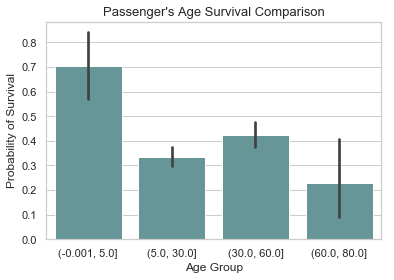

In [57]:
#plt.figure(figsize=(8,6))

# Creating a bar chart of passenger's age group (Age_binned) vs probability of survival (Survived)
sns.barplot(x='Age_binned', y='Survived', data=df_train, color='cadetblue')
plt.xlabel('Age Group')
plt.ylabel('Probability of Survival')
plt.title('Passenger\'s Age Survival Comparison', size=13)

plt.show()

There seems to be a recognizable pattern and correlation between the age group and the probability of survival. Thus, we are going to use this grouping for the subsequent analysis. 

Let's check the data type of ***Age_binned*** feature:

In [58]:
# Checking the data type of 'Age_binned' feature
df_train['Age_binned'].dtype

CategoricalDtype(categories=[(-0.001, 5.0], (5.0, 30.0], (30.0, 60.0], (60.0, 80.0]]
              ordered=True)

***Age_binned*** feature is still in a categorical data type. We need to tranform it to numerical data type. Because this feature is ordinal, the following transformations are made:
- Age group *0-5* is represented by value 0
- Age group *6-30* is represented by value 1
- Age group *31-60* is represented by value 2
- Age group *61-80* is represented by value 3

In [59]:
# Converting 'Age_binned' feature data type
df_train['Age_binned'] = pd.cut(df_train['Age'], [0, 5, 30, 60, 80], labels=[0, 1, 2, 3], retbins=False, include_lowest=True)
df_train['Age_binned'] = df_train['Age_binned'].astype('int')
df_test['Age_binned'] = pd.cut(df_test['Age'], [0, 5, 30, 60, 80], labels=[0, 1, 2, 3], retbins=False, include_lowest=True)
df_test['Age_binned'] = df_test['Age_binned'].astype('int')

We do not need ***Age*** feature anymore, so we can drop it.

In [60]:
# Dropping 'Age' feature
df_train.drop(columns='Age', inplace=True)
df_test.drop(columns='Age', inplace=True)

<a id='section 4.7.'></a>

## 4.7. Number of Siblings/Spouses (*SibSp*) EDA
We visualize number of siblings/spouses vs probability of survival (***Survived***) by calling the following:

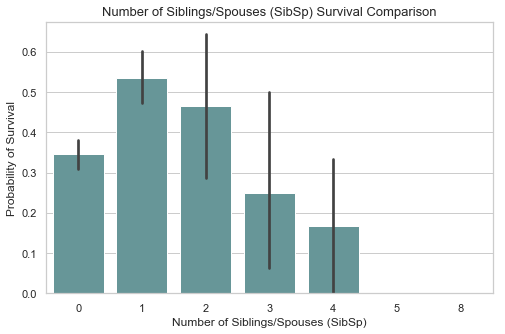

In [61]:
plt.figure(figsize=(8,5))

# Creating a bar chart of number of siblings/spouses (SibSp) vs probability of survival (Survived)
sns.barplot(x='SibSp', y='Survived', data=df_train, color='cadetblue')
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.ylabel('Probability of Survival')
plt.title('Number of Siblings/Spouses (SibSp) Survival Comparison', size=13)

plt.show()

From the chart above, we can observe the following:
- There is a decreasing trend of survival probability when the number of siblings/spouses is one and onward. 
- All passengers who had more than four siblings/spouses were not survived. 

As mentioned previously, in ***SibSp*** feature, values bigger than 2 are considered as outliers. Let's re-visualize this: 

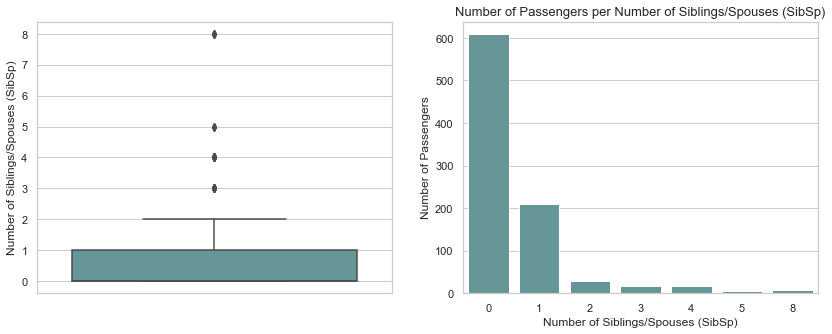

In [62]:
plt.figure(figsize=(14,5))

# Creating boxplot of 'SibSp' feature
plt.subplot(121)
sns.boxplot(x='SibSp', data=df_train, color='cadetblue', orient='v')
plt.ylabel('Number of Siblings/Spouses (SibSp)')

# Creating univariate distribution of 'SibSp' feature
plt.subplot(122)
sns.countplot(x='SibSp', data=df_train, color='cadetblue', orient='v')
plt.ylabel('Number of Passengers')
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.title('Number of Passengers per Number of Siblings/Spouses (SibSp)', size=13)

plt.show()

Only a small number of passengers has more than two siblings/spouses. Directly using these features can cause a lot of issues and adversely affect the analysis and machine learning models. 

Based on the above observations, we decide to bin values *3*, *4*, *5*, and *8* together into value *3*. In other words, value *3* represents number of siblings/spouses of more than two. 

In [63]:
# In SibSp feature, binning values 3 to 8 together into value 3 
df_train['SibSp'] = df_train['SibSp'].map(lambda x: 3 if x == 4 or x == 5 or x == 8 else x)
df_test['SibSp'] = df_test['SibSp'].map(lambda x: 3 if x == 4 or x == 5 or x == 8 else x)

Let's re-visualize number of siblings/spouses vs probability of survival bar chart after binning:

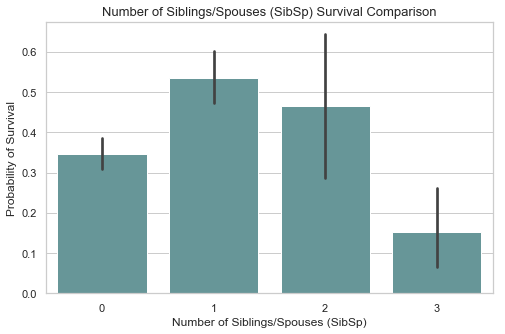

In [64]:
plt.figure(figsize=(8,5))

# Creating a bar chart of number of siblings/spouses (SibSp) vs probability of survival (Survived)
sns.barplot(x='SibSp', y='Survived', data=df_train, color='cadetblue')
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.ylabel('Probability of Survival')
plt.title('Number of Siblings/Spouses (SibSp) Survival Comparison', size=13)

plt.show()

<a id='section 4.8.'></a>

## 4.8. Number of Parents/Children (*Parch*) EDA
We visualize number of parents/children vs probability of survival (***Survived***) by calling the following:

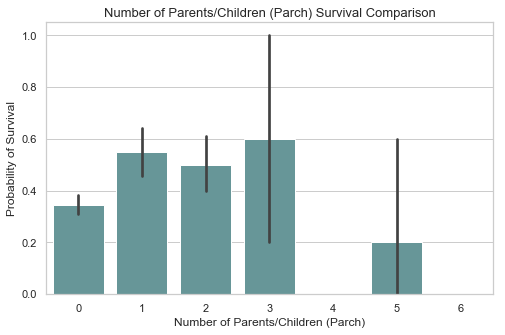

In [65]:
plt.figure(figsize=(8,5))

# Creating a bar chart of number parents/children (Parch) vs probability of survival (Survived)
sns.barplot(x='Parch', y='Survived', data=df_train, color='cadetblue')
plt.xlabel('Number of Parents/Children (Parch)')
plt.ylabel('Probability of Survival')
plt.title('Number of Parents/Children (Parch) Survival Comparison', size=13)

plt.show()

From the chart above, we can observe the following:
- All passengers who had more four and five parents/children were not survived.
- There is no apparent trend in the bar plot above. 

As mentioned previously, in ***Parch*** feature, values bigger than 0 are considered as outliers. Let's re-visualize this: 

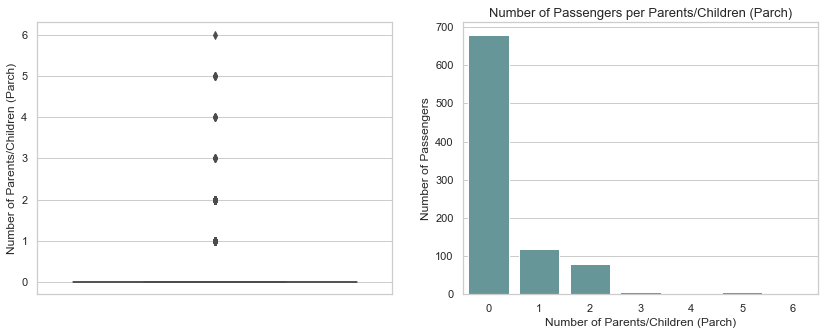

In [66]:
plt.figure(figsize=(14,5))

# Creating boxplot of 'Parch' feature
plt.subplot(121)
sns.boxplot(x='Parch', data=df_train, color='cadetblue', orient='v')
plt.ylabel('Number of Parents/Children (Parch)')

# Creating univariate distribution of 'Parch' feature
plt.subplot(122)
sns.countplot(x='Parch', data=df_train, color='cadetblue', orient='v')
plt.ylabel('Number of Passengers')
plt.xlabel('Number of Parents/Children (Parch)')
plt.title('Number of Passengers per Parents/Children (Parch)', size=13)

plt.show()

Based on the above observations, we decide to bin values *1* to *6* together into value *1*. In other words, value *1* represents passengers that had parents/chidren on board. 

In [67]:
# In Parch feature, binning value 1 to 6 together into value 1 
df_train['Parch'] = df_train['Parch'].map(lambda x: x if x == 0 else 1)
df_test['Parch'] = df_test['Parch'].map(lambda x: x if x == 0 else 1)

Let's re-visualize number of parents/children vs probability of survival bar chart after binning:

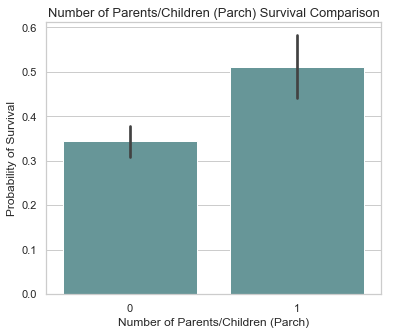

In [68]:
plt.figure(figsize=(6,5))

# Creating a bar chart of number of parents/children (Parch) vs probability of survival (Survived)
sns.barplot(x='Parch', y='Survived', data=df_train, color='cadetblue')
plt.xlabel('Number of Parents/Children (Parch)')
plt.ylabel('Probability of Survival')
plt.title('Number of Parents/Children (Parch) Survival Comparison', size=13)

plt.show()

<a id='section 4.9.'></a>

## 4.9. Number of  Siblings/Spouses/Parents/Children (*SibSp+Parch*) EDA
We visualize number of siblings/spouses/parents/children vs probability of survival (***Survived***) by calling the following:

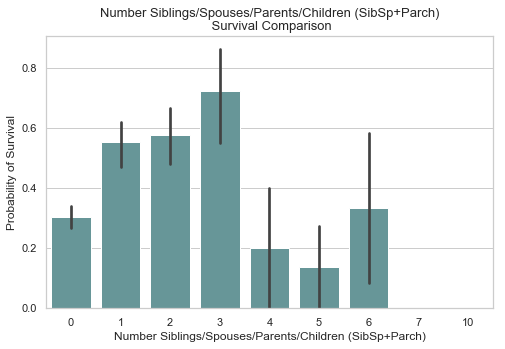

In [69]:
plt.figure(figsize=(8,5))

# Creating a bar chart of number siblings/spouses/parents/children (SibSp+Parch) vs 
# probability of survival (Survived)
sns.barplot(x='SibSp+Parch', y='Survived', data=df_train, color='cadetblue')
plt.xlabel('Number Siblings/Spouses/Parents/Children (SibSp+Parch)')
plt.ylabel('Probability of Survival')
plt.title('Number Siblings/Spouses/Parents/Children (SibSp+Parch)\n Survival Comparison', size=13)

plt.show()

From the chart above, we can observe the following:
- Passengers who had siblings/spouses/parents/children more than four had low probability of survival

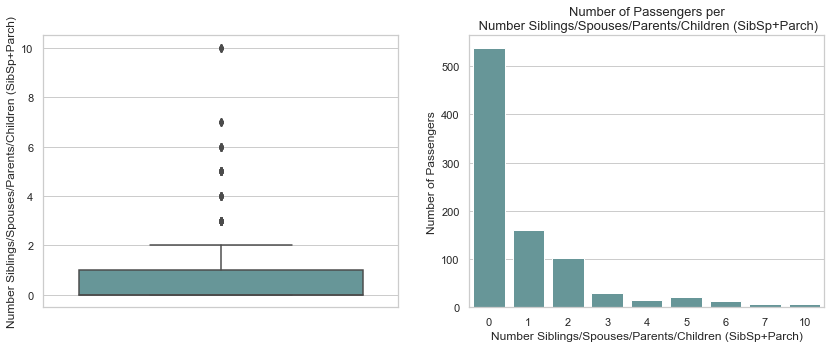

In [70]:
plt.figure(figsize=(14,5))

# Creating boxplot of 'SibSp+Parch' feature
plt.subplot(121)
sns.boxplot(x='SibSp+Parch', data=df_train, color='cadetblue', orient='v')
plt.ylabel('Number Siblings/Spouses/Parents/Children (SibSp+Parch)')

# Creating univariate distribution of 'SibSp+Parch' feature
plt.subplot(122)
sns.countplot(x='SibSp+Parch', data=df_train, color='cadetblue', orient='v')
plt.ylabel('Number of Passengers')
plt.xlabel('Number Siblings/Spouses/Parents/Children (SibSp+Parch)')
plt.title('Number of Passengers per\n Number Siblings/Spouses/Parents/Children (SibSp+Parch)', size=13)

plt.show()

Based on the charts above, we can infer that only a small number of passengers has siblings/spouses/parents/children more than two. We can also see that values higher than two are considered as outliers. 

Based on the above observations, we decide to bin values *1*, *2*, and *3* together into value *1*. In other words, value *1* represents number of siblings/spouses/parents/children between one and three. Meanwhile, we will bin values *4* to *10* together into value *2*. In other words, value *2* represents number of siblings/spouses/parents/children between four and 10.

In [71]:
# In SibSp+Parch feature, binning values 1, 2, and 3 together into value 1
df_train['SibSp+Parch'] = df_train['SibSp+Parch'].map(lambda x: 1 if x == 1 or x == 2 or x == 3 else x)
df_test['SibSp+Parch'] = df_test['SibSp+Parch'].map(lambda x: 1 if x == 1 or x == 2 or x == 3 else x)

# In SibSp+Parch feature, binning values 4 to 10 together into value 2
df_train['SibSp+Parch'] = df_train['SibSp+Parch'].map(lambda x: 2 if x == 4 or x == 5 or x == 6 or x == 7 or x == 10 else x)
df_test['SibSp+Parch'] = df_test['SibSp+Parch'].map(lambda x: 2 if x == 4 or x == 5 or x == 6 or x == 7 or x == 10 else x)

Let's re-visualize number of siblings/spouses/parents/children vs probability of survival bar chart after binning:

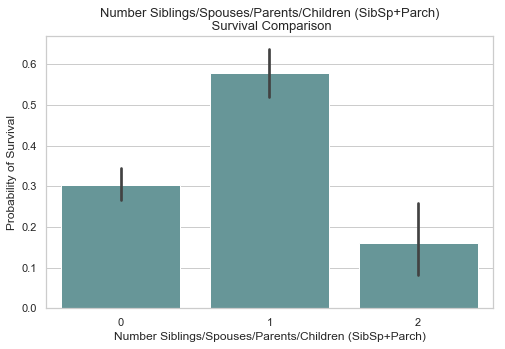

In [72]:
plt.figure(figsize=(8,5))

# Creating a bar chart of number siblings/spouses/parents/children (SibSp+Parch) vs 
# probability of survival (Survived)
sns.barplot(x='SibSp+Parch', y='Survived', data=df_train, color='cadetblue')
plt.xlabel('Number Siblings/Spouses/Parents/Children (SibSp+Parch)')
plt.ylabel('Probability of Survival')
plt.title('Number Siblings/Spouses/Parents/Children (SibSp+Parch)\n Survival Comparison', size=13)

plt.show()

<a id='section 4.10.'></a>

## 4.10. Ticket Price (*Fare*) EDA
We visualize histogram of ticket price with survived/not-survived stacked for each plot by calling the following:

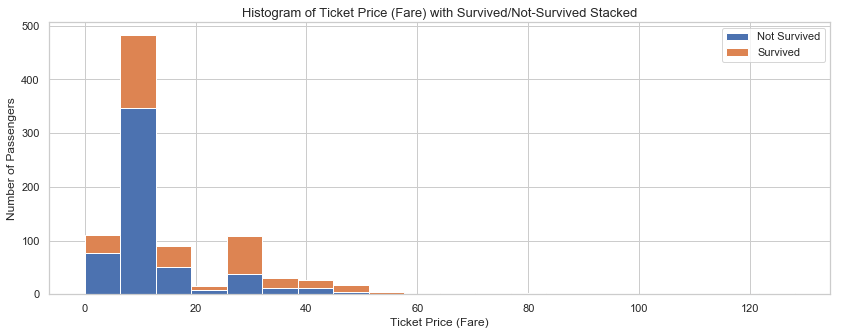

In [73]:
plt.figure(figsize=(14,5))

plt.hist([df_train.loc[df_train['Survived']==0,'Fare'], 
          df_train.loc[df_train['Survived']==1,'Fare']], stacked=True, bins=20, label=['Not Survived', 'Survived'])
plt.ylabel('Number of Passengers')
plt.xlabel('Ticket Price (Fare)')
plt.title('Histogram of Ticket Price (Fare) with Survived/Not-Survived Stacked', size=13)
plt.legend()

plt.show()

From the histogram, we can observe the following:
- The fraction of survived passengers increases as the ticket price increases. 
- The number of passengers that paid fare more than £100 are very small. 

Based on the above observations, we will bin the ticket price feature and store it in ***Fare_binned*** by calling the following:

In [74]:
# Binning 'Fare' feature
df_train['Fare_binned'] = pd.cut(df_train['Fare'], bins=[0,25,75,513], include_lowest=True)
df_test['Fare_binned'] = pd.cut(df_test['Fare'], bins=[0,25,75,513], include_lowest=True)

Let's visualize number of ticket price vs probability of survival bar chart after binning:

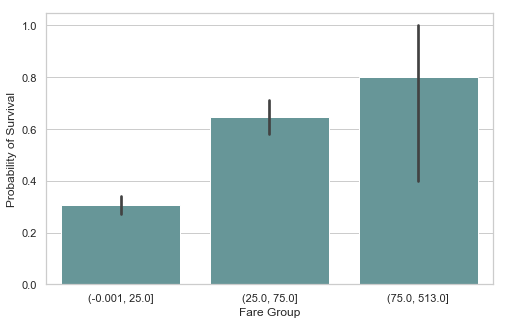

In [75]:
plt.figure(figsize=(8,5))

# Creating a bar chart of ticket price (Fare_binned) vs probability of survival (Survived)
sns.barplot(x='Fare_binned', y='Survived', data=df_train, color='cadetblue')
plt.ylabel('Probability of Survival')
plt.xlabel('Fare Group')

plt.show()

There seems to a clear correlation after we perform binning in ***Fare*** feature. 

Now, let's check the data type of ***Fare_binned*** feature.

In [76]:
df_train['Fare_binned'].dtype

CategoricalDtype(categories=[(-0.001, 25.0], (25.0, 75.0], (75.0, 513.0]]
              ordered=True)

***Fare_binned*** feature is still in a categorical data type. We need to tranform it to numerical data type. Because this feature is ordinal, the following transformations are made:
- Fare group 0-25 is represented by value 0
- Fare group 25-75 is represented by value 1
- Fare group 75-513 is represented by value 2

In [77]:
# Converting 'Fare' feature data type
df_train['Fare_binned'] = pd.cut(df_train['Fare'], bins=[0,25,75,513], labels=[0, 1, 2], retbins=False, include_lowest=True)
df_train['Fare_binned'] = df_train['Fare_binned'].astype('int')
df_test['Fare_binned'] = pd.cut(df_test['Fare'], bins=[0,25,75,513], labels=[0, 1, 2], retbins=False, include_lowest=True)
df_test['Fare_binned'] = df_test['Fare_binned'].astype('int')

We do not need ***Fare*** feature anymore, so we can drop it.

In [78]:
# Dropping 'Fare' feature
df_train.drop(columns='Fare', inplace=True)
df_test.drop(columns='Fare', inplace=True)

<a id='section 4.11.'></a>

## 4.11. Passenger's Cabin (*Cabin*) EDA
Before we perform EDA on ***Cabin*** feature, we will transform it so the values represent only the first letter of the cabin name. 

In [79]:
# Getting the first letter of 'Cabin' feature
df_train['Cabin'] = df_train['Cabin'].str.get(0)

We visualize ***Cabin*** vs probability of survival (***Survived***) by calling the following:

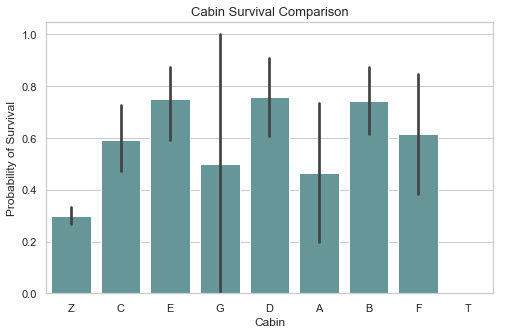

In [80]:
plt.figure(figsize=(8,5))

# Creating a bar chart of Cabin vs probability of survival (Survived)
sns.barplot(x='Cabin', y='Survived', data=df_train, color='cadetblue')
plt.ylabel('Probability of Survival')
plt.xlabel('Cabin')
plt.title('Cabin Survival Comparison', size=13)

plt.show()

We can observe that passengers in cabin *E*, *D*, and *B* had a high chance of survival. Meanwhile, passengers with no cabin (*Z*) had lower chance of survival than passengers with a cabin (please see this [section](#Imputing missing values in Cabin feature) to understand why *Z* value represents passenger with no cabin). 

Based on this observation, we will create a feature named ***HaveCabin***, which determines whether a passenger had a cabin or not. If a passenger had a cabin, ***HaveCabin*** = 1. And if a passenger had no cabin, ***HaveCabin*** = 0. 

In [81]:
# Creating 'HaveCabin' feature
#df_train['HaveCabin'] = df_train['Cabin'].str.get(0)
df_test['HaveCabin'] = df_test['Cabin'].str.get(0)
df_train['HaveCabin'] = df_train['Cabin'].map(lambda x: 0 if x == 'Z' else 1)
df_test['HaveCabin'] = df_test['HaveCabin'].map(lambda x: 0 if x == 'Z' else 1)

Let's visualize ***HaveCabin*** vs probability of survival:

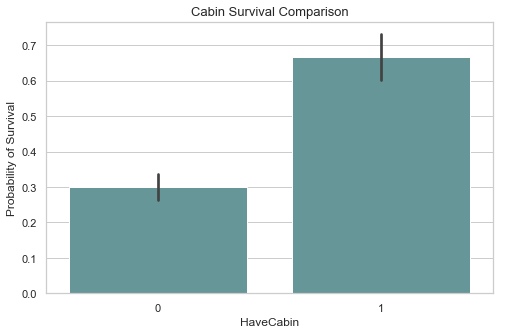

In [82]:
plt.figure(figsize=(8,5))

sns.barplot(x='HaveCabin', y='Survived', data=df_train, color='cadetblue')
plt.ylabel('Probability of Survival')
plt.xlabel('HaveCabin')
plt.title('Cabin Survival Comparison', size=13)

plt.show()

We do not need ***Cabin*** feature anymore, so we can drop it.

In [83]:
# Dropping 'Cabin' feature
df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

<a id='section 4.12.'></a>

## 4.12. Correlation Among Features
Let's visualize the correlation among features by using a heatmap.

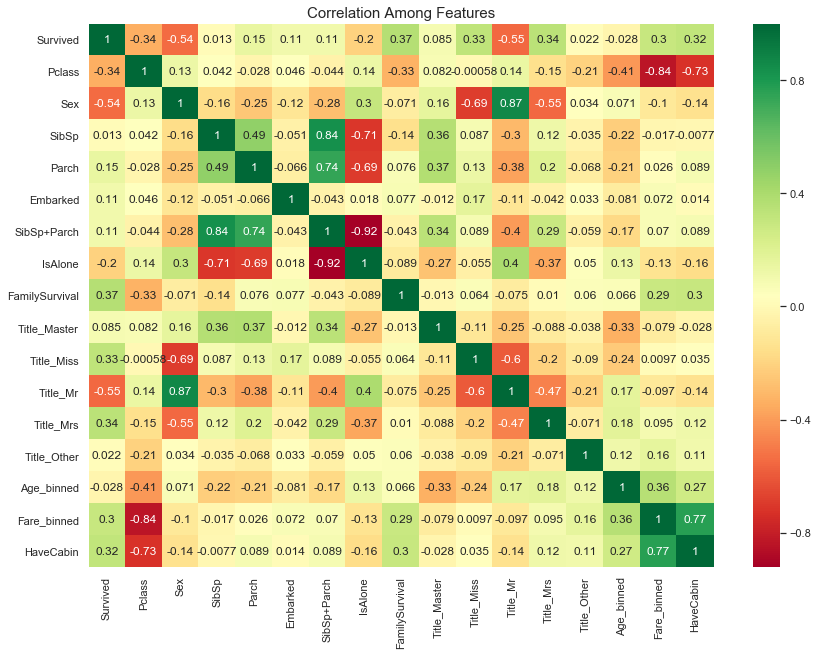

In [84]:
plt.figure(figsize=(14,10))

# Creating a heatmap of correlation among features
sns.heatmap(df_train.corr(), cmap='RdYlGn', annot=True)
plt.title('Correlation Among Features', size=15)

plt.show()

We can observe that ***Pclass***, ***Sex***, ***FamilySurvival***, and ***HaveCabin*** are some features that have a pretty high correlation with ***Survived***. Some multicollinearities (i.e., collinearity among independent features) are detected, such as ***Title_Mr*** and ***Sex***. Multicollinear features cause redundancies as they contain almost the same information. This increase training time. We should try to eliminate redundant features as it reduces training time. But for now, we will permit multicollinearities in our dataset. 

<a id='section 5.0.'></a>

# 5.0. Data Modelling
There is no machine learning algorithm that works best in all situations. So, the best approach is to generate a high performance model is by trying multiple algorithms, optimizing them, and comparing them for your specific scenario. In this section, we perform the following:
- [**5.1. Simple Modelling**](#section 5.1.): We will handpick several machine learning algorithms and create models based on them and the dataset we have.
- [**5.2. Hyperparameter Optimization for the Best Models**](#section 5.2.): We will pick the best models based on the simple modelling, and then tune their hyperparameters to improve their performance. 
- [**5.3. Model Optimization with Feature Selection**](#section 5.3.): More independent features do not make a better model, but the right independent features do. We will perform feature selection to automatically select features that contribute the most to output feature we are interested in.  

In this problem, we use **accuracy** as the measure of model's performance. Accuracy is the fraction of predictions our model got right. 

<a id='section 5.1.'></a>

## 5.1. Simple Modelling
We will handpick several machine learning algorithms and create models based on them and the dataset we have. Then, cross-validation is performed to estimate the accuracy of the machine learning models. You can read more about cross-validation in this [article](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f).

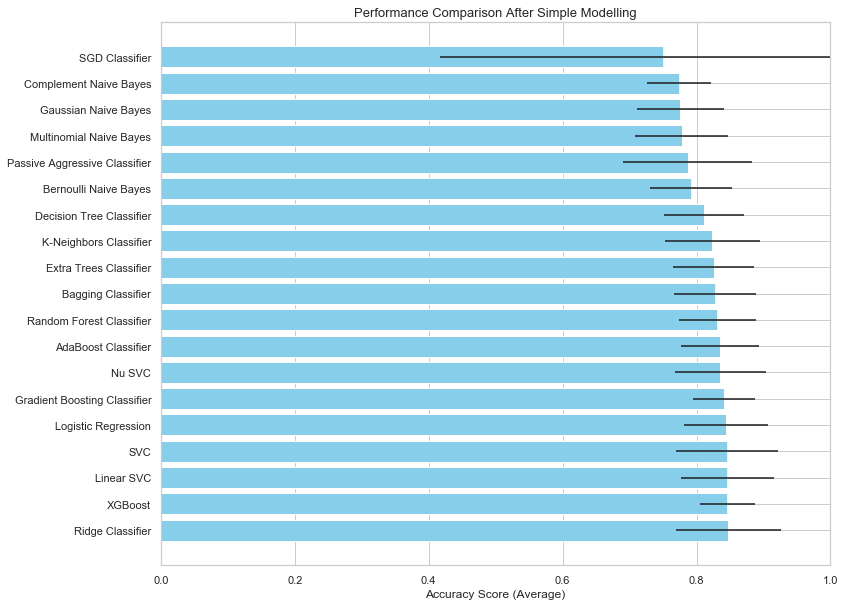

In [85]:
# List of machine learning algorithms that will be used for predictions
estimator = [('Logistic Regression', LogisticRegression), ('Ridge Classifier', RidgeClassifier), 
             ('SGD Classifier', SGDClassifier), ('Passive Aggressive Classifier', PassiveAggressiveClassifier), 
             ('SVC', SVC), ('Linear SVC', LinearSVC), ('Nu SVC', NuSVC), 
             ('K-Neighbors Classifier', KNeighborsClassifier),
             ('Gaussian Naive Bayes', GaussianNB), ('Multinomial Naive Bayes', MultinomialNB), 
             ('Bernoulli Naive Bayes', BernoulliNB), ('Complement Naive Bayes', ComplementNB), 
             ('Decision Tree Classifier', DecisionTreeClassifier), 
             ('Random Forest Classifier', RandomForestClassifier), ('AdaBoost Classifier', AdaBoostClassifier), 
             ('Gradient Boosting Classifier', GradientBoostingClassifier), ('Bagging Classifier', BaggingClassifier), 
             ('Extra Trees Classifier', ExtraTreesClassifier), ('XGBoost', XGBClassifier)]

# Separating independent features and dependent feature from the dataset
X_train = df_train.drop(columns='Survived')
y_train = df_train['Survived']

# Creating a dataframe to compare the performance of the machine learning models
comparison_cols = ['Algorithm', 'Training Time (Avg)', 'Accuracy (Avg)', 'Accuracy (3xSTD)']
comparison_df = pd.DataFrame(columns=comparison_cols)

# Generating training/validation dataset splits for cross validation
cv_split = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

# Performing cross-validation to estimate the performance of the models
for idx, est in enumerate(estimator):
    
    cv_results = cross_validate(est[1](), X_train, y_train, cv=cv_split)
    
    comparison_df.loc[idx, 'Algorithm'] = est[0]
    comparison_df.loc[idx, 'Training Time (Avg)'] = cv_results['fit_time'].mean()
    comparison_df.loc[idx, 'Accuracy (Avg)'] = cv_results['test_score'].mean()
    comparison_df.loc[idx, 'Accuracy (3xSTD)'] = cv_results['test_score'].std() * 3

comparison_df.set_index(keys='Algorithm', inplace=True)
comparison_df.sort_values(by='Accuracy (Avg)', ascending=False, inplace=True)

#Visualizing the performance of the models
fig, ax = plt.subplots(figsize=(12,10))

y_pos = np.arange(len(comparison_df))
ax.barh(y_pos, comparison_df['Accuracy (Avg)'], xerr=comparison_df['Accuracy (3xSTD)'], color='skyblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(comparison_df.index)
ax.set_xlabel('Accuracy Score (Average)')
ax.set_title('Performance Comparison After Simple Modelling', size=13)
ax.set_xlim(0, 1)

plt.show()

Based on the chart above, we can achieve ~84% accuracy by performing simple modelling. In the next section, we will try to improve the models by tuning their hyperparameters.  

<a id='section 5.2.'></a>

## 5.2. Hyperparameter Optimization for the Best Models
Hyperparameters are parameters whose value are set before the learning process begins. In other words, we cannot optimize hyperparameters through learning process. Hyperparameter optimization is the process of selecting the values for a model’s hyperparameters that maximize the accuracy of the model. In this section, we pick 10 top models to be optimized. We use [grid-search cross-validation](https://chrisalbon.com/machine_learning/model_evaluation/cross_validation_parameter_tuning_grid_search/) method to optimize the hyperparameters. 

In [87]:
# A list of machine learning algorithms that will be optimized
estimator = [('Logistic Regression', LogisticRegression), ('Ridge Classifier', RidgeClassifier), ('SVC', SVC), 
             ('Linear SVC', LinearSVC), ('Nu SVC', NuSVC), ('Random Forest Classifier', RandomForestClassifier), 
             ('AdaBoost Classifier', AdaBoostClassifier), 
             ('Gradient Boosting Classifier', GradientBoostingClassifier), 
             ('Bagging Classifier', BaggingClassifier), ('XGBoost', XGBClassifier)
            ]

index = [est[0] for est in estimator]

# A dictionary containing hyperparameters that are to be optimized for each machine learning algorithm
grid_params = {'SVC': {'C': np.arange(1,21,1), 'gamma': [0.005, 0.01, 0.015, 0.02], 'random_state': [0]},
               'Ridge Classifier': {'alpha': [0.001, 0.0025, 0.005], 'random_state': [0]},
               'Nu SVC': {'nu': [0.5], 'gamma': [0.001, 0.01, 0.1, 1], 'random_state': [0]},
               'Gradient Boosting Classifier': {'learning_rate': [0.001, 0.005, 0.01, 0.015], 'random_state': [0],
                                                'max_depth': [1,2,3,4,5], 'n_estimators': [300, 350, 400, 450, 500]},
               'Linear SVC': {'C': [1, 5, 10], 'random_state': [0]},
               'Logistic Regression': {'C': np.arange(2,7.5,0.25), 
                                       'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
                                       'random_state': [0]},
               'AdaBoost Classifier': {'learning_rate': np.arange(0.05, 0.21, 0.01), 'n_estimators': [50, 75, 100, 125, 150], 
                                       'random_state': [0]},
               'Random Forest Classifier': {'n_estimators': [200, 250, 300, 350], 'max_depth': [1,2,3,4,5,6], 
                                            'criterion': ['gini', 'entropy'], 'random_state': [0]},
               'Bagging Classifier': {'n_estimators': np.arange(200, 300, 10), 'random_state': [0]},
               'XGBoost': {'learning_rate': [0.001, 0.005, 0.01, 0.015], 'random_state': [0],
                           'max_depth': [1,2,3,4,5], 'n_estimators': [300, 350, 400, 450, 500]}
              }

# Creating a dataframe to compare the performance of the machine learning models after hyperparameter optimization 
best_params_df = pd.DataFrame(columns=['Optimized Hyperparameters', 'Accuracy'], index=index)

# start_total = time.perf_counter()

# Performing grid-search cross-validation to optimize hyperparameters and estimate the performance of the models
for idx, est in enumerate(estimator):
    
    # start = time.perf_counter()
    
    best_clf = GridSearchCV(est[1](), param_grid=grid_params[est[0]], cv=cv_split, scoring='accuracy', n_jobs=12)
    best_clf.fit(X_train, y_train)
    
    # run = time.perf_counter() - start
    
    best_params_df.loc[est[0], 'Optimized Hyperparameters'] = [best_clf.best_params_]
    best_params_df.loc[est[0], 'Accuracy'] = best_clf.best_score_
    
    #print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(est[0], best_clf.best_params_, run))

    
#run_total = time.perf_counter() - start_total
#print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

The results of grid-search cross-validation is shown below:

In [88]:
# Showing the results of grid-search cross-validation
best_params_df.sort_values('Accuracy')

,Optimized Hyperparameters,Accuracy
Bagging Classifier,"[{'n_estimators': 210, 'random_state': 0}]",0.825
Nu SVC,"[{'gamma': 0.1, 'nu': 0.5, 'random_state': 0}]",0.83806
Logistic Regression,"[{'C': 3.25, 'random_state': 0, 'solver': 'newton-cg'}]",0.844776
Linear SVC,"[{'C': 1, 'random_state': 0}]",0.846269
AdaBoost Classifier,"[{'learning_rate': 0.11000000000000001, 'n_estimators': 50, 'random_state': 0}]",0.847015
Ridge Classifier,"[{'alpha': 0.001, 'random_state': 0}]",0.847388
SVC,"[{'C': 20, 'gamma': 0.02, 'random_state': 0}]",0.850746
Random Forest Classifier,"[{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 300, 'random_state': 0}]",0.853731
XGBoost,"[{'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 350, 'random_state...",0.855224
Gradient Boosting Classifier,"[{'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 450, 'random_state...",0.856343


The best performance is achieved by gradient boosting classifier with 85.63% accuracy. This is a slight improvement from 84% accuracy achieved by simple modelling. 

<a id='section 5.3.'></a>

## 5.3. Model Optimization with Feature Selection
Feature selection is the process to select features that contribute the most to the output feature we are interested in. Having irrelevant features in our data can decrease the accuracy of the model and make your model learn based on irrelevant features. There are some techniques that can be used to perform feature selection. This [article](https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2) by Sudharsan Asaithambi discuss various types of feature selection. 

In this problem, we use recursive feature elimination with cross validation (RFECV) for selecting features. A detail explanation about [RFECV](https://scikit-learn.org/stable/modules/feature_selection.html) can be read here. We can see from the previous analysis that gradient boosting classifier is the best performing algorithms. Therefore, we use it for our model. 

In [89]:
# Performing feature selection using RFECV
xg = GradientBoostingClassifier(learning_rate=0.005, max_depth=2, n_estimators=450, random_state=0)
selector = RFECV(xg, step=1, cv=cv_split, scoring='accuracy', n_jobs=8)
selector = selector.fit(X_train, y_train)

The result of RFECV can be seen below:

In [90]:
# Showing the result of RFECV
pd.DataFrame([X_train.columns, selector.ranking_], index=['Features', 'Ranking']).T.sort_values(by='Ranking')

,Features,Ranking
0,Pclass,1
1,Sex,1
5,SibSp+Parch,1
7,FamilySurvival,1
10,Title_Mr,1
14,Fare_binned,1
15,HaveCabin,2
8,Title_Master,3
13,Age_binned,4
12,Title_Other,5


It can be observed that ***Pclass***, ***Sex***, ***SibSp+Parch***, ***FamilySurvival***, ***Title_Mr***, and ***Fare_binned*** are the most important features for our gradient boosting classifier model. Let's see how our model perform by using the selected features.

In [91]:
# Listing the selected features based on RFECV
selected_features = ['Pclass', 'Sex', 'SibSp+Parch', 'FamilySurvival', 'Title_Mr', 'Fare_binned']

# Training the gradient boosting classifier model
gb = GradientBoostingClassifier(learning_rate=0.005, max_depth=2, n_estimators=450, random_state=0)
gb.fit(X_train[selected_features], y_train)

# Estimating the performance of the model by using cross-validation
gb_acc_score = cross_val_score(gb, X_train[selected_features], y_train, cv=cv_split, scoring='accuracy')

print('The performance of the model using the selected features: {:.2f}%'.format(gb_acc_score.mean()*100))

The performance of the model using the selected features: 85.34%


The performance of the model with feature selection (85.34% accuracy) is slightly lower than without feature selection (85.63% accuracy). But, with only six independent features, we can build a model that has an accuracy resembling of model with 16 features. This is the power of feature selection, where we can select features that contribute the most to our model.

<a id='section 6.0.'></a>

# 6.0. Prediction
We use gradient boosting classifier with hyperparameter optimization and RFECV feature selection to predict the survival of passengers in out test dataset.

In [92]:
# Training the model
gb = GradientBoostingClassifier(learning_rate=0.005, max_depth=2, n_estimators=450, random_state=0)
gb.fit(X_train[selected_features], y_train)

# Creating a submission file
test_Survived = pd.DataFrame(gb.predict(df_test[selected_features]), columns=['Survived'], index=np.arange(892,1310,1))
test_Survived = test_Survived.reset_index()
test_Survived.rename(columns={'index': 'PassengerID'}, inplace=True)
test_Survived.to_csv("gb.csv",index=False)

Our model yields **81.339%** accuracy and is on the **top 7%** of the total entries. Not bad for our first attempt. Any suggestions to improve our score are most welcome.

<a id='References'></a>

# References

The following kernels are my main references in creating this notebook:
- [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)
- [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
- [Titanic Top 4% with ensemble modeling](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling)
- [Blood is thicker than water & friendship forever](https://www.kaggle.com/shunjiangxu/blood-is-thicker-than-water-friendship-forever)